In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split


In [5]:
# 2015

#Read the 2015 WHR data from the CSV file
df_2015 = pd.read_csv('C:/Users/JAMMITHRI/Downloads/Happiness_Report/2015.csv')

#Add a 'year' column with the value 2015 for all rows
df_2015['year'] = 2015

#Replace spaces in column names with underscores
df_2015.columns = df_2015.columns.str.replace(' ', '_')

#Now, the data from the 2015 WHR report is labeled with the year 2015
df_2015.head(5)


,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [6]:
print(df_2015.columns)

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual', 'year'],
      dtype='object')


In [7]:
#selected needed features
cols = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual', 'year']
df_2015 = df_2015[cols]
df_2015.head(5)

,Country,Region,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [8]:
#Rename country to merge
df_2015 = df_2015.rename(columns= {'Country' : 'country'})
df_2015.head(1)

,country,Region,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015


In [9]:
#2016

#Read the 2016 WHR data from the CSV file
df_2016 = pd.read_csv('C:/Users/JAMMITHRI/Downloads/Happiness_Report/2016.csv')

#Add a 'year' column with the value 2016 for all rows
df_2016['year'] = 2016

#Replace spaces in column names with underscores
df_2016.columns = df_2016.columns.str.replace(' ', '_')

#Now, the data from the 2016 WHR report is labeled with the year 2016
df_2016.head()


,Country,Region,Happiness_Rank,Happiness_Score,Lower_Confidence_Interval,Upper_Confidence_Interval,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [10]:
print(df_2016.columns)

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual', 'year'],
      dtype='object')


In [11]:
cols = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual', 'year']
df_2016 = df_2016[cols]
df_2016.head(5)

,Country,Region,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [12]:
#Rename country to merge
df_2016 = df_2016.rename(columns = {'Country': 'country'})
df_2016.head(1)

,country,Region,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016


In [13]:
#2017

#Read the 2017 WHR data from the CSV file
df_2017 = pd.read_csv('C:/Users/JAMMITHRI/Downloads/Happiness_Report/2017.csv')

#Add a 'year' column with the value 2017 for all rows
df_2017['year'] = 2017

#Replace spaces in column names with underscores
df_2017.columns = df_2017.columns.str.replace(' ', '_')

#Now, the data from the 2017 WHR report is labeled with the year 2017
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [14]:
print(df_2017.columns)

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'year'],
      dtype='object')


In [15]:
#Select Needed Features
cols = ['Country', 'Happiness.Rank', 'Happiness.Score', 
       'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'year']
df_2017 = df_2017[cols]
df_2017.head(5)

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [16]:
#Rename country to merge
df_2017 = df_2017.rename(columns = {'Country': 'country'})
df_2017.head(1)

,country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017


In [17]:
#2018

#Read the 2018 WHR data from the CSV file
df_2018 = pd.read_csv('C:/Users/JAMMITHRI/Downloads/Happiness_Report/2018.csv')

#Add a 'year' column with the value 2015 for all rows
df_2018['year'] = 2018

#Replace spaces in column names with underscores
df_2018.columns = df_2018.columns.str.replace(' ', '_')

#Now, the data from the 2018 WHR report is labeled with the year 2018
df_2018.head()

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [18]:
print(df_2018.columns)

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'year'],
      dtype='object')


In [19]:
cols = ['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'year']
df_2018 = df_2018[cols]
df_2018.head(5)

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [20]:
#Rename country to merge
df_2018 = df_2018.rename(columns = {'Country_or_region': 'country'})
df_2018.head(1)

,Overall_rank,country,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018


In [21]:
#2019

#Read the 2019 WHR data from the CSV file
df_2019 = pd.read_csv('C:/Users/JAMMITHRI/Downloads/Happiness_Report/2019.csv')

#Add a 'year' column with the value 2019 for all rows
df_2019['year'] = 2019

#Replace spaces in column names with underscores
df_2019.columns = df_2019.columns.str.replace(' ', '_')

#Now, the data from the 2019 WHR report is labeled with the year 2019
df_2019.head()

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [22]:
print(df_2019.columns)

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'year'],
      dtype='object')


In [23]:
cols = ['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'year']
df_2019 = df_2019[cols]
df_2019.head(5)

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [24]:
#Rename country to merge
df_2019 = df_2019.rename(columns = {'Country_or_region': 'country'})
df_2019.head(1)

,Overall_rank,country,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,year
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393,2019


In [25]:
#2020

#Read the 2020 WHR data from the CSV file
df_2020 = pd.read_csv('C:/Users/JAMMITHRI/Downloads/Happiness_Report/2020.csv')

#Add a 'year' column with the value 2020 for all rows
df_2020['year'] = 2020

#Replace spaces in column names with underscores
df_2020.columns = df_2020.columns.str.replace(' ', '_')

#Now, the data from the 2020 WHR report is labeled with the year 2020
df_2020.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,...,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual,year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2020
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,2020
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,2020
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,2020


In [26]:
print(df_2020.columns)

Index(['Country_name', 'Regional_indicator', 'Ladder_score',
       'Standard_error_of_ladder_score', 'upperwhisker', 'lowerwhisker',
       'Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Ladder_score_in_Dystopia',
       'Explained_by:_Log_GDP_per_capita', 'Explained_by:_Social_support',
       'Explained_by:_Healthy_life_expectancy',
       'Explained_by:_Freedom_to_make_life_choices',
       'Explained_by:_Generosity', 'Explained_by:_Perceptions_of_corruption',
       'Dystopia_+_residual', 'year'],
      dtype='object')


In [27]:
cols = ['Country_name', 'Regional_indicator', 'Ladder_score',
       'Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Ladder_score_in_Dystopia',
       'Dystopia_+_residual', 'year']
df_2020 = df_2020[cols]
df_2020.head(5)

,Country_name,Regional_indicator,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Dystopia_+_residual,year
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,2.762835,2020
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,2.432741,2020
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,2.350267,2020
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,2.460688,2020
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,2.168266,2020


In [28]:
#Rename country to merge
df_2020 = df_2020.rename(columns = {'Country_name': 'country'})
df_2020.head(1)

,country,Regional_indicator,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Dystopia_+_residual,year
0,Finland,Western Europe,7.8087,10.639267,0.95433,71.900825,0.949172,-0.059482,0.195445,1.972317,2.762835,2020


In [29]:
#2021

#Read the 2021 WHR data from the CSV file
df_2021 = pd.read_csv('C:/Users/JAMMITHRI/Downloads/Happiness_Report/2021.csv')

#Add a 'year' column with the value 2021 for all rows
df_2021['year'] = 2021

#Replace spaces in column names with underscores
df_2021.columns = df_2021.columns.str.replace(' ', '_')

#Now, the data from the 2021 WHR report is labeled with the year 2021
df_2021.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,...,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual,year
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,2021
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2021
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2021
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,2021
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,2021


In [30]:
print(df_2021.columns)

Index(['Country_name', 'Regional_indicator', 'Ladder_score',
       'Standard_error_of_ladder_score', 'upperwhisker', 'lowerwhisker',
       'Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Ladder_score_in_Dystopia',
       'Explained_by:_Log_GDP_per_capita', 'Explained_by:_Social_support',
       'Explained_by:_Healthy_life_expectancy',
       'Explained_by:_Freedom_to_make_life_choices',
       'Explained_by:_Generosity', 'Explained_by:_Perceptions_of_corruption',
       'Dystopia_+_residual', 'year'],
      dtype='object')


In [31]:
cols = ['Country_name', 'Regional_indicator', 'Ladder_score',
       'Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Ladder_score_in_Dystopia',
       'Dystopia_+_residual', 'year']
df_2021 = df_2021[cols]
df_2021.head(5)

,Country_name,Regional_indicator,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Dystopia_+_residual,year
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,3.253,2021
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.43,2.868,2021
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.43,2.839,2021
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.43,2.967,2021
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.43,2.798,2021


In [32]:
#Rename country to merge
df_2021 = df_2021.rename(columns = {'Country_name': 'country'})
df_2021.head(1)

,country,Regional_indicator,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Dystopia_+_residual,year
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,3.253,2021


In [33]:
#2022

#Read the 2022 WHR data from the CSV file
df_2022 = pd.read_csv('C:/Users/JAMMITHRI/Downloads/Happiness_Report/2022.csv')

#Add a 'year' column with the value 2022 for all rows
df_2022['year'] = 2022

#Replace spaces in column names with underscores
df_2022.columns = df_2022.columns.str.replace(' ', '_')

#Now, the data from the 2022 WHR report is labeled with the year 2022
df_2022.head()

,RANK,Country,Happiness_score,Whisker-high,Whisker-low,Dystopia_(1.83)_+_residual,Explained_by:_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,year
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534",2022
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532",2022
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191",2022
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461",2022
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419",2022


In [34]:
print(df_2022.columns)

Index(['RANK', 'Country', 'Happiness_score', 'Whisker-high', 'Whisker-low',
       'Dystopia_(1.83)_+_residual', 'Explained_by:_GDP_per_capita',
       'Explained_by:_Social_support', 'Explained_by:_Healthy_life_expectancy',
       'Explained_by:_Freedom_to_make_life_choices',
       'Explained_by:_Generosity', 'Explained_by:_Perceptions_of_corruption',
       'year'],
      dtype='object')


In [35]:
cols = ['RANK', 'Country', 'Happiness_score',
       'year']
df_2022 = df_2022[cols]
df_2022.head(5)

,RANK,Country,Happiness_score,year
0,1,Finland,"7,821",2022
1,2,Denmark,"7,636",2022
2,3,Iceland,"7,557",2022
3,4,Switzerland,"7,512",2022
4,5,Netherlands,"7,415",2022


In [36]:
#Rename country to merge
df_2022 = df_2022.rename(columns = {'Country': 'country'})
df_2022.head(1)

,RANK,country,Happiness_score,year
0,1,Finland,"7,821",2022


In [37]:
#2023

#Read the 2023 WHR data from the CSV file
df_2023 = pd.read_csv('C:/Users/JAMMITHRI/Downloads/Happiness_Report/WHR2023.csv')

#Add a 'year' column with the value 2013 for all rows
df_2023['year'] = 2023

#Replace spaces in column names with underscores
df_2023.columns = df_2023.columns.str.replace(' ', '_')

#Now, the data from the 2015 WHR report is labeled with the year 2015
df_2023.head()

,Country_name,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual,year
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363,2023
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084,2023
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250,2023
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691,2023
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110,2023


In [38]:
print(df_2023.columns)

Index(['Country_name', 'Ladder_score', 'Standard_error_of_ladder_score',
       'upperwhisker', 'lowerwhisker', 'Logged_GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Ladder_score_in_Dystopia',
       'Explained_by:_Log_GDP_per_capita', 'Explained_by:_Social_support',
       'Explained_by:_Healthy_life_expectancy',
       'Explained_by:_Freedom_to_make_life_choices',
       'Explained_by:_Generosity', 'Explained_by:_Perceptions_of_corruption',
       'Dystopia_+_residual', 'year'],
      dtype='object')


In [39]:
cols = ['Country_name', 'Ladder_score', 'Logged_GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Ladder_score_in_Dystopia',
       'Dystopia_+_residual', 'year']
df_2023 = df_2023[cols]
df_2023.head(5)

,Country_name,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Dystopia_+_residual,year
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,2.363,2023
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.778,2.084,2023
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.778,2.250,2023
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,2.691,2023
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.778,2.110,2023


In [40]:
#Rename country to merge
df_2023 = df_2023.rename(columns = {'Country_name': 'country'})
df_2023.head(1)

,country,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Dystopia_+_residual,year
0,Finland,7.804,10.792,0.969,71.15,0.961,-0.019,0.182,1.778,2.363,2023


In [41]:
#2024

#Read the 2024 WHR data from the CSV file
df_2024 = pd.read_csv('C:/Users/JAMMITHRI/Downloads/Happiness_Report/WHR2024.csv')

#Add a 'year' column with the value 2015 for all rows
df_2024['year'] = 2024

#Replace spaces in column names with underscores
df_2024.columns = df_2024.columns.str.replace(' ', '_')

#Now, the data from the 2015 WHR report is labeled with the year 2015
df_2024.head()

,Country_name,Ladder_score,upperwhisker,lowerwhisker,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual,year
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,2024
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,2024
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,2024
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,2024
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,2024


In [42]:
print(df_2024.columns)

Index(['Country_name', 'Ladder_score', 'upperwhisker', 'lowerwhisker',
       'Explained_by:_Log_GDP_per_capita', 'Explained_by:_Social_support',
       'Explained_by:_Healthy_life_expectancy',
       'Explained_by:_Freedom_to_make_life_choices',
       'Explained_by:_Generosity', 'Explained_by:_Perceptions_of_corruption',
       'Dystopia_+_residual', 'year'],
      dtype='object')


In [43]:
cols = ['Country_name', 'Ladder_score', 'Dystopia_+_residual', 'year']
df_2024 = df_2024[cols]
df_2024.head(5)

,Country_name,Ladder_score,Dystopia_+_residual,year
0,Finland,7.741,2.082,2024
1,Denmark,7.583,1.881,2024
2,Iceland,7.525,2.050,2024
3,Sweden,7.344,1.658,2024
4,Israel,7.341,2.298,2024


In [44]:
#Rename country to merge
df_2024 = df_2024.rename(columns = {'Country_name': 'country'})
df_2024.head(1)

,country,Ladder_score,Dystopia_+_residual,year
0,Finland,7.741,2.082,2024


In [45]:
#List of dataframes
dataframes = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024]

#Combine the dataframes into one dataframe named 'WHR'
WHR = pd.concat(dataframes, ignore_index=True)
WHR.head(5)

,country,Region,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,...,Healthy_life_expectancy,Freedom_to_make_life_choices,Perceptions_of_corruption,Regional_indicator,Ladder_score,Logged_GDP_per_capita,Ladder_score_in_Dystopia,Dystopia_+_residual,RANK,Happiness_score
0,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
print(WHR.columns)

Index(['country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual', 'year', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Overall_rank',
       'Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Perceptions_of_corruption',
       'Regional_indicator', 'Ladder_score', 'Logged_GDP_per_capita',
       'Ladder_score_in_Dystopia', 'Dystopia_+_residual', 'RANK',
       'Happiness_score'],
      dtype='object')


In [47]:
#Combine similar columns into new features 
#Create a new column 'region' by combining 'Regional_indicator' Use fillna() to handle missing values and keep only the non-null values
WHR['region'] = WHR['Region'].fillna(WHR['Regional_indicator'])
#Display the first 5 rows of the dataframes with the new 'region' column
print(WHR[['region']].head(5))

           region
0  Western Europe
1  Western Europe
2  Western Europe
3  Western Europe
4   North America


In [48]:
WHR['happiness_rank'] = WHR['Happiness_Rank'].fillna(WHR['Happiness_Rank']).fillna(WHR['Overall_rank']).fillna(WHR['RANK'])
print(WHR[['happiness_rank']].head(5))

   happiness_rank
0             1.0
1             2.0
2             3.0
3             4.0
4             5.0


In [49]:
WHR['new_happiness_score'] = WHR['Happiness_Score'].fillna(WHR['Happiness.Score']).fillna(WHR['Score']).fillna(WHR['Ladder_score']).fillna(WHR['Happiness_score'])
print(WHR[['new_happiness_score']].head(5))

  new_happiness_score
0               7.587
1               7.561
2               7.527
3               7.522
4               7.427


In [50]:
WHR['economy'] = WHR['Economy_(GDP_per_Capita)'].fillna(WHR['Economy..GDP.per.Capita.']).fillna(WHR['GDP_per_capita']).fillna(WHR['Logged_GDP_per_capita'])
print(WHR[['economy']].head(5))

   economy
0  1.39651
1  1.30232
2  1.32548
3  1.45900
4  1.32629


In [51]:
WHR['social_support'] = WHR['Family'].fillna(WHR['Social_support'])
print(WHR[['social_support']].head(5))

   social_support
0         1.34951
1         1.40223
2         1.36058
3         1.33095
4         1.32261


In [52]:
WHR['life_expectancy'] = WHR['Health_(Life_Expectancy)'].fillna(WHR['Health..Life.Expectancy.']).fillna(WHR['Healthy_life_expectancy'])
print(WHR[['life_expectancy']].head(5))

   life_expectancy
0          0.94143
1          0.94784
2          0.87464
3          0.88521
4          0.90563


In [53]:
WHR['freedom'] = WHR['Health_(Life_Expectancy)'].fillna(WHR['Freedom_to_make_life_choices'])
print(WHR[['freedom']].head(5))

   freedom
0  0.94143
1  0.94784
2  0.87464
3  0.88521
4  0.90563


In [54]:
WHR['corruption'] = WHR['Trust_(Government_Corruption)'].fillna(WHR['Trust..Government.Corruption.']).fillna(WHR['Perceptions_of_corruption'])
print(WHR[['corruption']].head(5))

   corruption
0     0.41978
1     0.14145
2     0.48357
3     0.36503
4     0.32957


In [55]:
WHR['dystopia'] = WHR['Dystopia_Residual'].fillna(WHR['Dystopia.Residual']).fillna(WHR['Ladder_score_in_Dystopia']).fillna(WHR['Dystopia_+_residual'])
print(WHR[['dystopia']].head(5))

   dystopia
0   2.51738
1   2.70201
2   2.49204
3   2.46531
4   2.45176


In [56]:
WHR = WHR.rename(columns= {'Generosity' : 'generosity'})

In [57]:
columns_to_drop = ['Region', 'Regional_indicator', 'Happiness_Rank', 'Happiness.Rank', 
                   'Overall_rank', 'RANK', 'Happiness_Score', 'Happiness.Score', 'Score', 
                   'Ladder_score', 'Happiness_score', 'Economy_(GDP_per_Capita)', 
                   'Economy..GDP.per.Capita.', 'GDP_per_capita', 'Logged_GDP_per_capita', 'Family',
                   'Social_support', 'Health_(Life_Expectancy)', 'Health..Life.Expectancy.', 
                   'Healthy_life_expectancy', 'Freedom', 'Freedom_to_make_life_choices', 
                   'Trust_(Government_Corruption)', 'Trust..Government.Corruption.', 
                   'Perceptions_of_corruption', 'Dystopia_Residual', 'Dystopia.Residual', 
                   'Ladder_score_in_Dystopia', 'Dystopia_+_residual']

#Drop the columns
WHR.drop(columns=columns_to_drop, axis = 1, inplace = True)

#Verify the change
print(WHR.columns)

Index(['country', 'generosity', 'year', 'region', 'happiness_rank',
       'new_happiness_score', 'economy', 'social_support', 'life_expectancy',
       'freedom', 'corruption', 'dystopia'],
      dtype='object')


In [58]:
WHR = WHR.rename(columns = {'new_happiness_score' : 'happiness_score'})

In [59]:
print(WHR.dtypes)

country             object
generosity         float64
year                 int64
region              object
happiness_rank     float64
happiness_score     object
economy            float64
social_support     float64
life_expectancy    float64
freedom            float64
corruption         float64
dystopia           float64
dtype: object


In [60]:
WHR['happiness_score'] = pd.to_numeric(WHR['happiness_score'], errors='coerce')
print(WHR.dtypes)

country             object
generosity         float64
year                 int64
region              object
happiness_rank     float64
happiness_score    float64
economy            float64
social_support     float64
life_expectancy    float64
freedom            float64
corruption         float64
dystopia           float64
dtype: object


In [61]:
WHR.head()

,country,generosity,year,region,happiness_rank,happiness_score,economy,social_support,life_expectancy,freedom,corruption,dystopia
0,Switzerland,0.29678,2015,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.94143,0.41978,2.51738
1,Iceland,0.43630,2015,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.94784,0.14145,2.70201
2,Denmark,0.34139,2015,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.87464,0.48357,2.49204
3,Norway,0.34699,2015,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.88521,0.36503,2.46531
4,Canada,0.45811,2015,North America,5.0,7.427,1.32629,1.32261,0.90563,0.90563,0.32957,2.45176


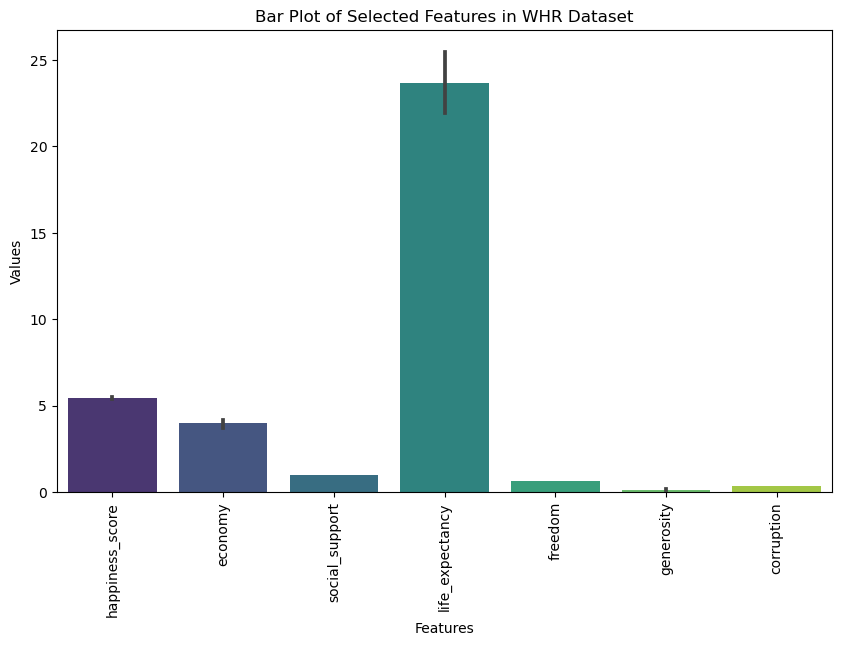

In [62]:
features_of_interest = ['happiness_score', 'economy', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']
plt.figure(figsize=(10, 6))
sns.barplot(data=WHR[features_of_interest], palette='viridis')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Bar Plot of Selected Features in WHR Dataset')
plt.xticks(rotation=90)
plt.show()

In [63]:
WHR.shape

(1511, 12)

In [64]:
countries_to_keep = ['United States', 'Finland', 'Denmark']
regions_to_keep = ['North America', 'Western Europe']
WHR2 = WHR[WHR['country'].isin(countries_to_keep) & WHR['region'].isin(regions_to_keep)]
WHR2.head()

,country,generosity,year,region,happiness_rank,happiness_score,economy,social_support,life_expectancy,freedom,corruption,dystopia
2,Denmark,0.34139,2015,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.87464,0.48357,2.49204
5,Finland,0.23351,2015,Western Europe,6.0,7.406,1.29025,1.31826,0.88911,0.88911,0.41372,2.61955
14,United States,0.40105,2015,North America,15.0,7.119,1.39451,1.24711,0.86179,0.86179,0.15890,2.51011
158,Denmark,0.36171,2016,Western Europe,1.0,7.526,1.44178,1.16374,0.79504,0.79504,0.44453,2.73939
162,Finland,0.25492,2016,Western Europe,5.0,7.413,1.40598,1.13464,0.81091,0.81091,0.41004,2.82596


In [65]:
des = WHR.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()
print(des.to_string())

                  count     mean    std      min      25%      50%      75%      max
generosity       1221.0     0.14   0.17    -0.30     0.04     0.15     0.24     0.84
year             1511.0  2019.39   2.86  2015.00  2017.00  2019.00  2022.00  2024.00
happiness_rank    774.0    77.95  44.80     1.00    39.00    78.00   116.75   158.00
happiness_score  1364.0     5.44   1.13     1.72     4.57     5.46     6.27     7.84
economy          1221.0     3.96   4.14     0.00     0.84     1.27     8.80    11.66
social_support   1221.0     0.98   0.30     0.00     0.79     0.93     1.22     1.64
life_expectancy  1220.0    23.65  31.05     0.00     0.59     0.82    62.00    77.28
freedom          1066.0     0.62   0.23     0.00     0.47     0.66     0.81     1.03
corruption       1220.0     0.34   0.32     0.00     0.08     0.17     0.71     0.94
dystopia         1049.0     2.01   0.49    -0.07     1.78     1.97     2.43     3.84


array([[<Axes: title={'center': 'generosity'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

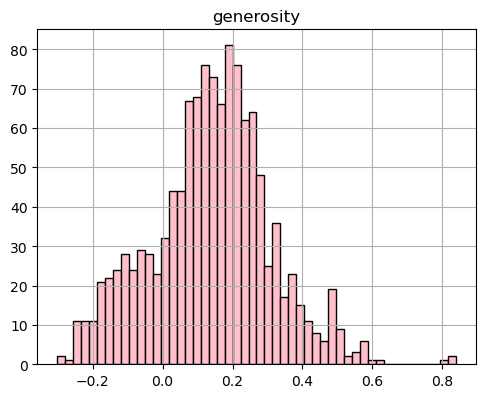

In [66]:
#plotting histogram
WHR[['generosity']].hist(bins=50, figsize=(13, 10), layout=(2,2), color='pink', edgecolor='black')

array([[<Axes: title={'center': 'year'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

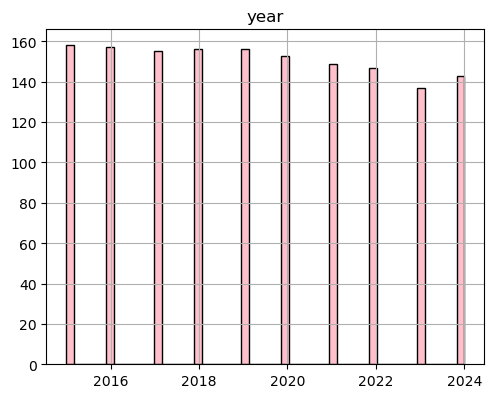

In [67]:
#plotting histogram
WHR[['year']].hist(bins=50, figsize=(13, 10), layout=(2,2), color='pink', edgecolor='black')

array([[<Axes: title={'center': 'happiness_rank'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

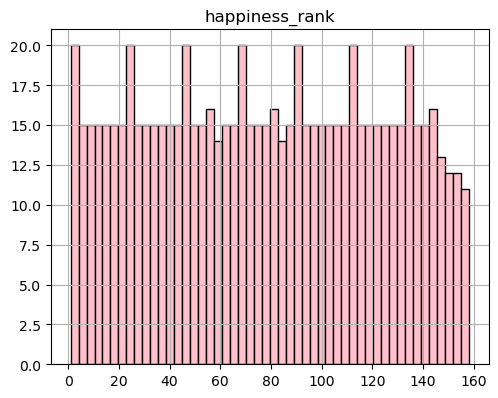

In [68]:
#plotting histogram
WHR[['happiness_rank']].hist(bins=50, figsize=(13, 10), layout=(2,2), color='pink', edgecolor='black')

array([[<Axes: title={'center': 'happiness_score'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

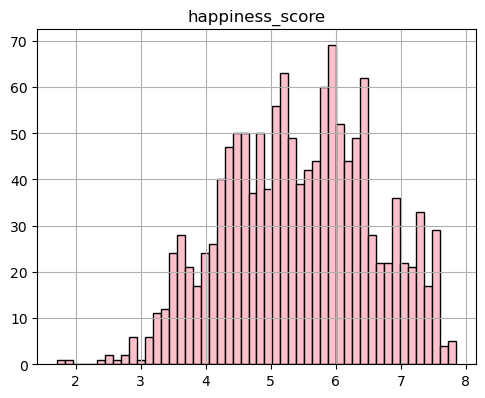

In [69]:
#plotting histogram
WHR[['happiness_score']].hist(bins=50, figsize=(13, 10), layout=(2,2), color='pink', edgecolor='black')

array([[<Axes: title={'center': 'economy'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

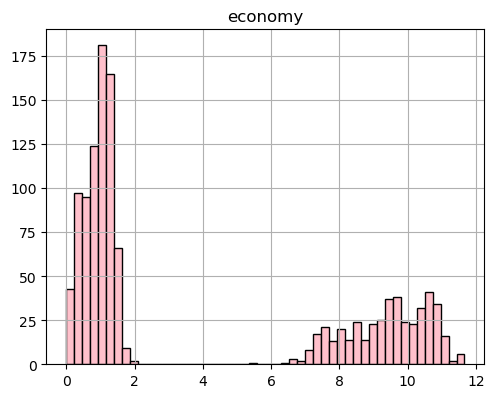

In [70]:
#plotting histogram
WHR[['economy']].hist(bins=50, figsize=(13, 10), layout=(2,2), color='pink', edgecolor='black')

array([[<Axes: title={'center': 'social_support'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

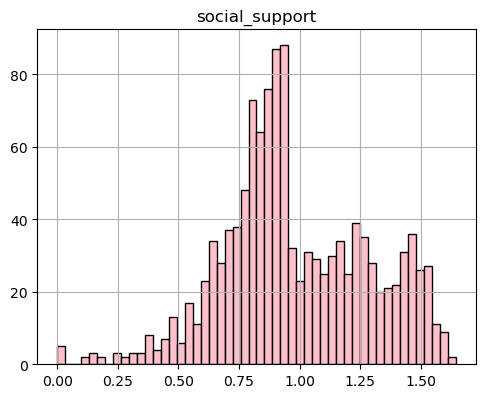

In [71]:
#plotting histogram
WHR[['social_support']].hist(bins=50, figsize=(13, 10), layout=(2,2), color='pink', edgecolor='black')

array([[<Axes: title={'center': 'life_expectancy'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

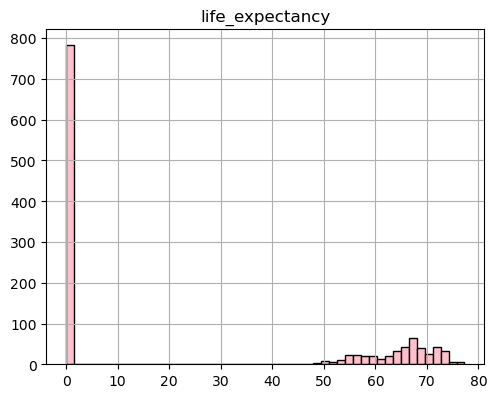

In [72]:
#plotting histogram
WHR[['life_expectancy']].hist(bins=50, figsize=(13, 10), layout=(2,2), color='pink', edgecolor='black')

array([[<Axes: title={'center': 'freedom'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

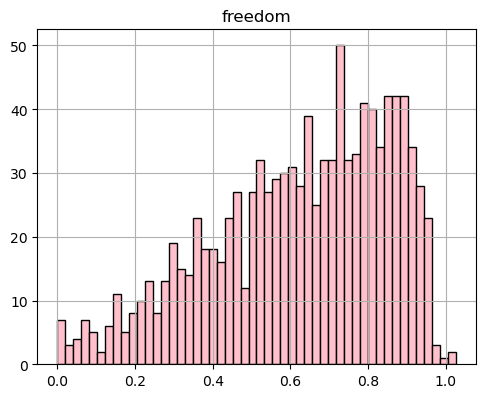

In [73]:
#plotting histogram
WHR[['freedom']].hist(bins=50, figsize=(13, 10), layout=(2,2), color='pink', edgecolor='black')

array([[<Axes: title={'center': 'corruption'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

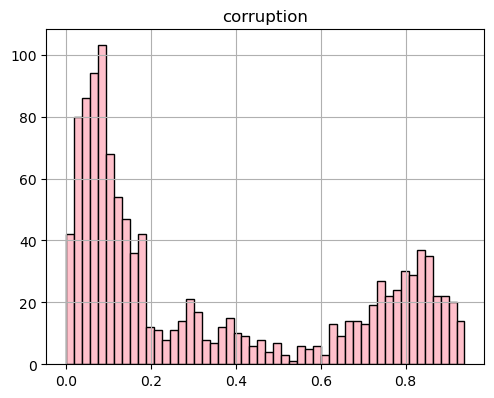

In [74]:
#plotting histogram
WHR[['corruption']].hist(bins=50, figsize=(13, 10), layout=(2,2), color='pink', edgecolor='black')

array([[<Axes: title={'center': 'dystopia'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

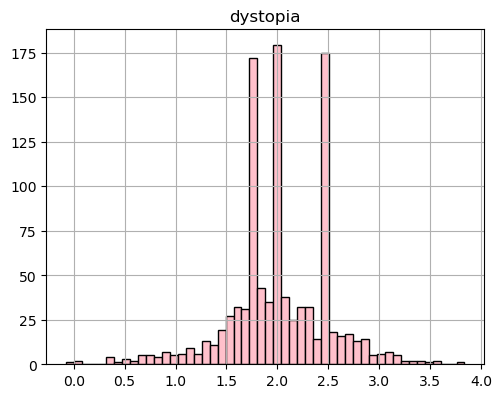

In [75]:
#plotting histogram
WHR[['dystopia']].hist(bins=50, figsize=(13, 10), layout=(2,2), color='pink', edgecolor='black')

In [76]:
WHR.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

country    199
region      16
dtype: int64

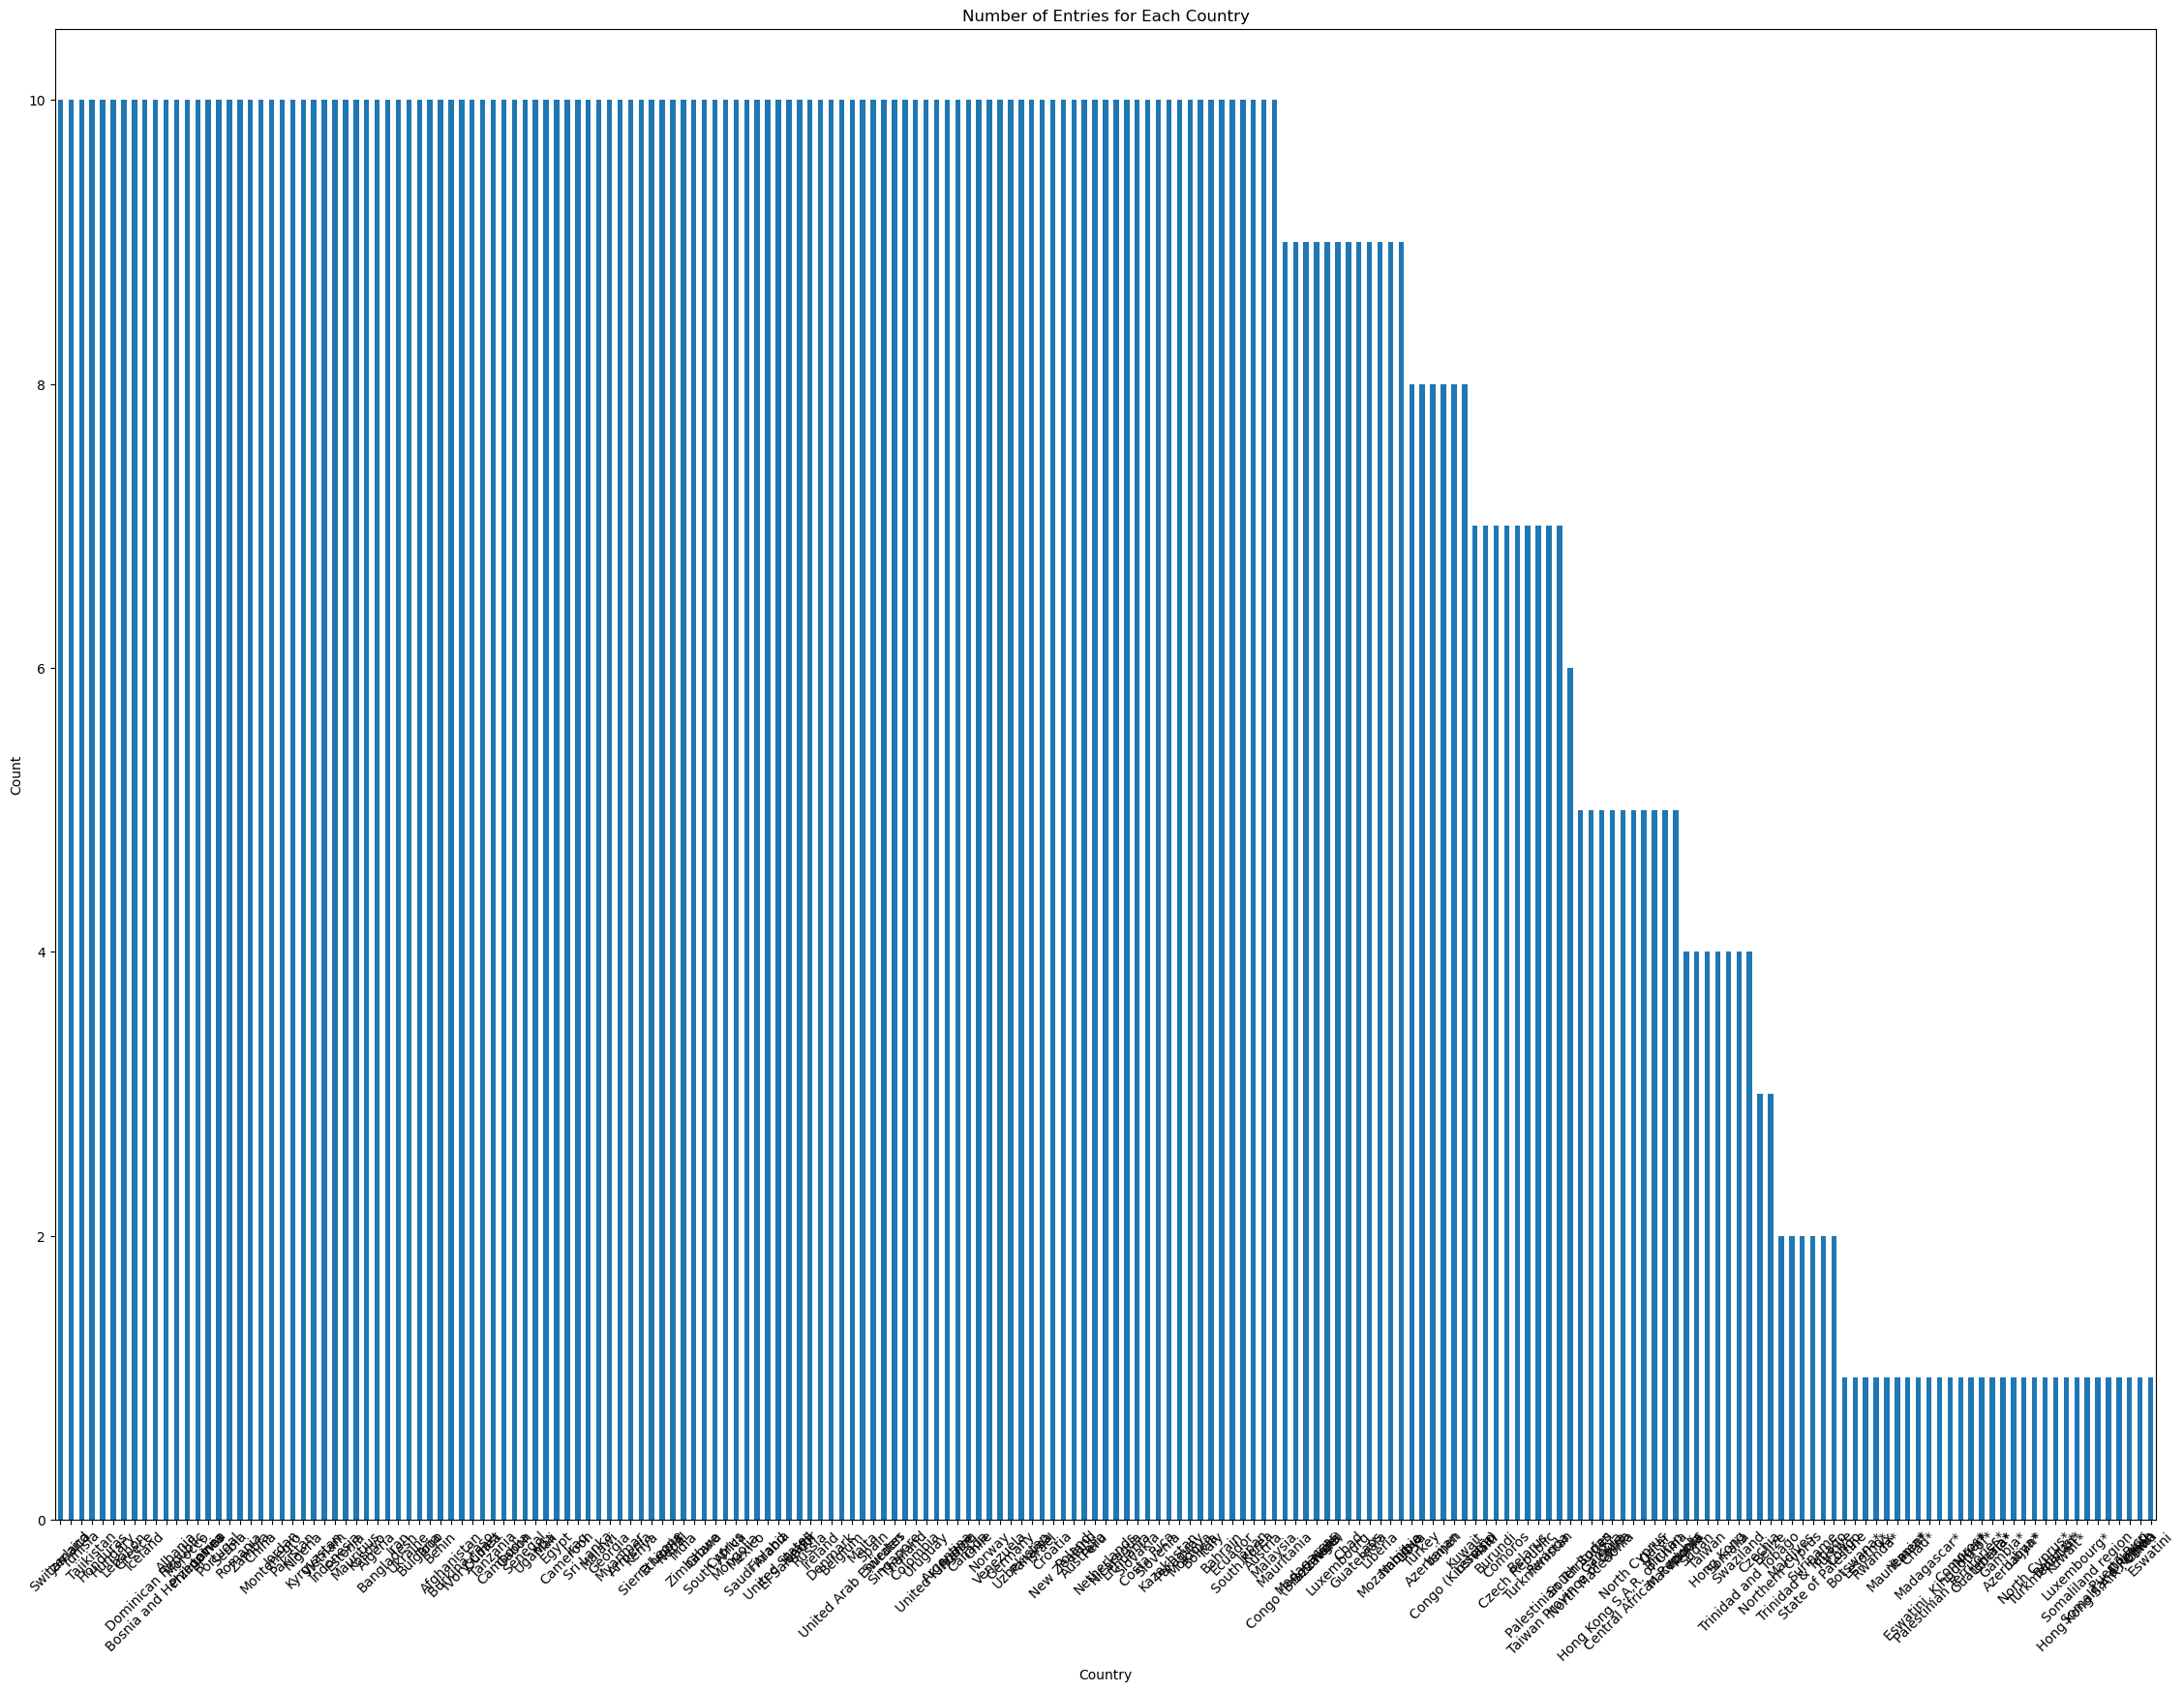

In [77]:
country_counts = WHR['country'].value_counts()

plt.figure(figsize=(28, 20))
country_counts.plot(kind='bar')

plt.title('Number of Entries for Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

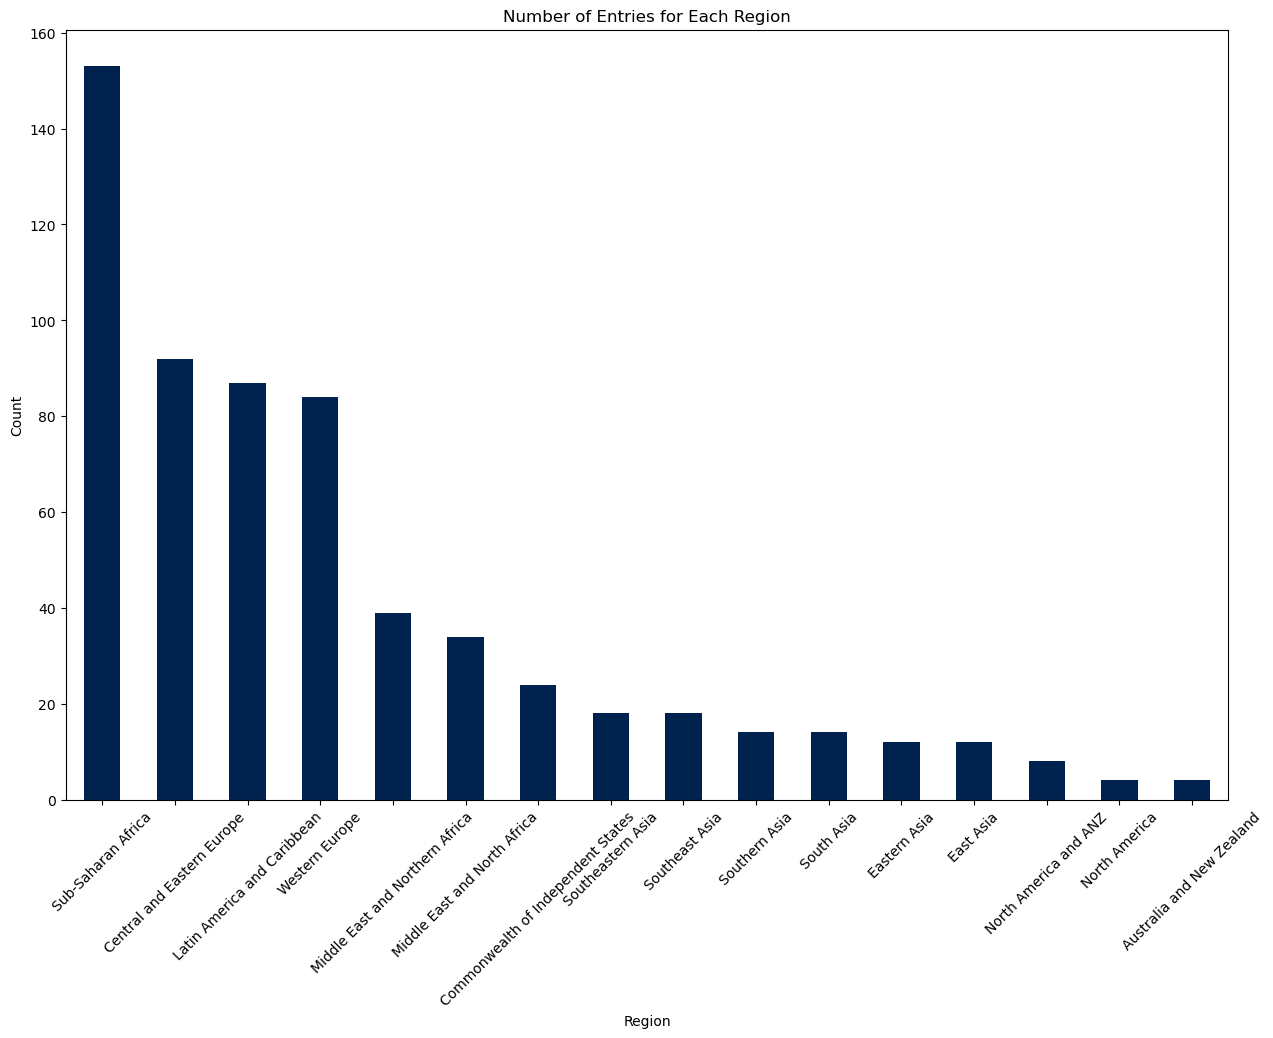

In [78]:
region_counts = WHR['region'].value_counts()

plt.figure(figsize=(15, 10))
region_counts.plot(kind='bar', cmap = 'cividis')

plt.title('Number of Entries for Each Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [79]:
#HANDLING MISSING VALUES

print(WHR.dtypes)


country             object
generosity         float64
year                 int64
region              object
happiness_rank     float64
happiness_score    float64
economy            float64
social_support     float64
life_expectancy    float64
freedom            float64
corruption         float64
dystopia           float64
dtype: object


In [80]:
#check for missing values
missing_values = WHR.isnull().sum()
print(missing_values)

country              0
generosity         290
year                 0
region             894
happiness_rank     737
happiness_score    147
economy            290
social_support     290
life_expectancy    291
freedom            445
corruption         291
dystopia           462
dtype: int64


In [81]:
print(WHR.shape)

(1511, 12)


In [82]:
# List of numeric variables to impute
numeric_vars = [
    'generosity', 
    'happiness_rank', 
    'happiness_score', 
    'economy', 
    'social_support', 
    'life_expectancy', 
    'freedom', 
    'corruption', 
    'dystopia'
]
# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=20)

# Impute missing values
WHR[numeric_vars] = imputer.fit_transform(WHR[numeric_vars])

# Verify the changes
print(WHR[numeric_vars].isnull().sum())

generosity         0
happiness_rank     0
happiness_score    0
economy            0
social_support     0
life_expectancy    0
freedom            0
corruption         0
dystopia           0
dtype: int64


In [83]:
# Calculate the mode of the 'region' variable
mode_region = WHR['region'].mode()[0]

# Impute missing values in the 'region' column with the mode
WHR['region'] = WHR['region'].fillna(mode_region)

# Verify the changes
print(WHR['region'].isnull().sum())

0


In [84]:
WHR2 = WHR.copy()

WHR2.head()

,country,generosity,year,region,happiness_rank,happiness_score,economy,social_support,life_expectancy,freedom,corruption,dystopia
0,Switzerland,0.29678,2015,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.94143,0.41978,2.51738
1,Iceland,0.43630,2015,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.94784,0.14145,2.70201
2,Denmark,0.34139,2015,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.87464,0.48357,2.49204
3,Norway,0.34699,2015,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.88521,0.36503,2.46531
4,Canada,0.45811,2015,North America,5.0,7.427,1.32629,1.32261,0.90563,0.90563,0.32957,2.45176


In [85]:
# Check for duplicate rows
duplicate_rows = WHR2.duplicated()

# Calculate the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows in the WHR4 dataset: {num_duplicates}")

# Display the duplicate rows
if num_duplicates > 0:
    print("Duplicate rows in the WHR4 dataset:")
    duplicates = WHR2[duplicate_rows]
    print(duplicates)

Number of duplicate rows in the WHR4 dataset: 0


In [86]:
WHR2['economy'].unique()

array([1.39651   , 1.30232   , 1.32548   , ..., 0.41525095, 0.37481759,
       2.90313939])

In [87]:
# Create a integer part of 'economy'
WHR2['economy'] = WHR2['economy'].astype(int)

# Print unique values to verify the grouping
print(WHR2['economy'].unique())

[ 1  0  2 10 11  9  8  7  6  5  4  3]


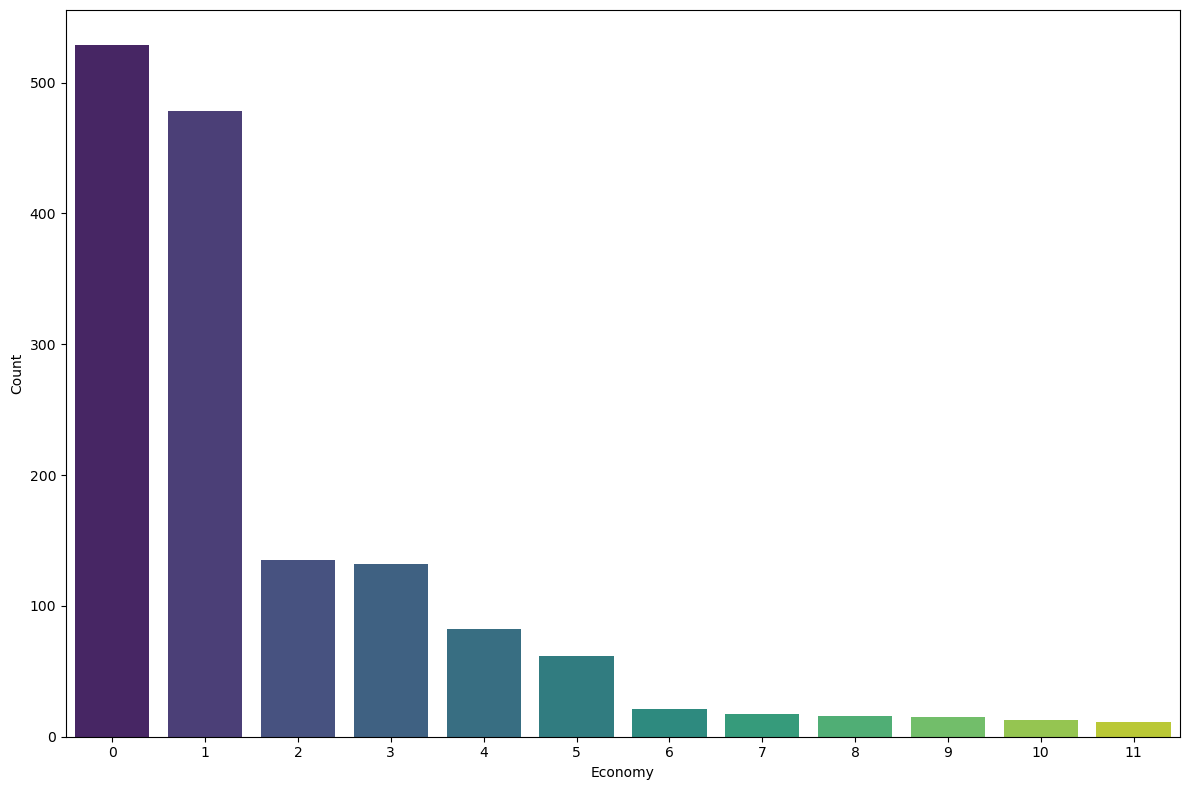

In [88]:
value_counts = WHR2['economy'].value_counts()

# Sort the value counts in ascending order
sorted_value_counts = value_counts.sort_index(ascending=True)

# Plot the distribution using seaborn
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(x=sorted_value_counts.index, y=value_counts.values, palette='viridis')  # Change color palette if needed

plt.xlabel('Economy')
plt.ylabel('Count')

plt.tight_layout()  # Adjust layout
plt.show()

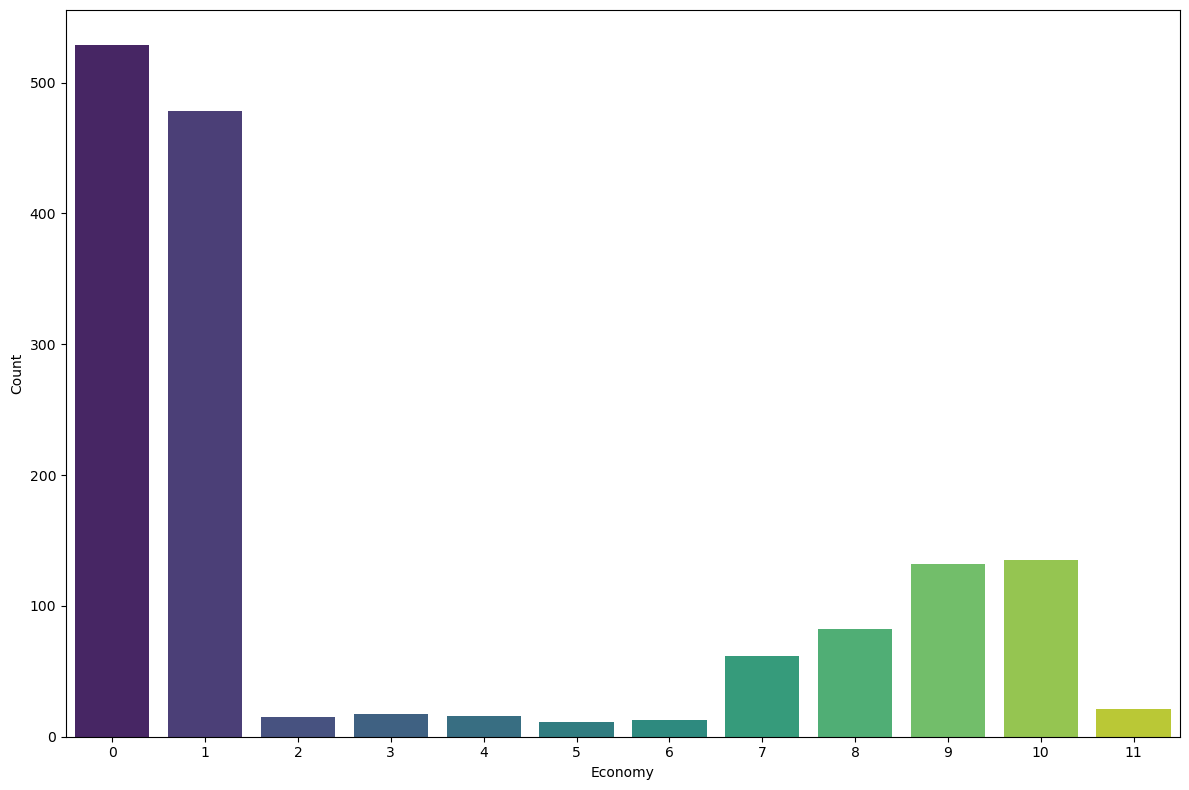

In [89]:
value_counts = WHR2['economy'].value_counts()

# Plot the distribution using seaborn without sorting
plt.figure(figsize=(12, 8))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')  # Change color palette if needed

plt.xlabel('Economy')
plt.ylabel('Count')

plt.tight_layout()  # Adjust layout
plt.show()

In [90]:
WHR2.head(2)

,country,generosity,year,region,happiness_rank,happiness_score,economy,social_support,life_expectancy,freedom,corruption,dystopia
0,Switzerland,0.29678,2015,Western Europe,1.0,7.587,1,1.34951,0.94143,0.94143,0.41978,2.51738
1,Iceland,0.43630,2015,Western Europe,2.0,7.561,1,1.40223,0.94784,0.94784,0.14145,2.70201


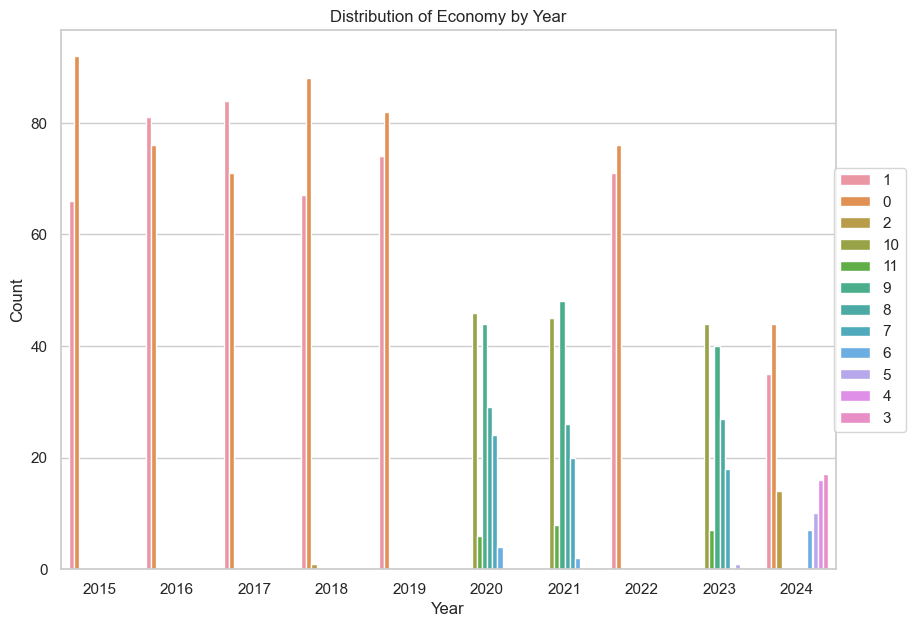

In [93]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure columns used for plotting are strings
WHR2['year'] = WHR2['year'].astype(str)
WHR2['economy'] = WHR2['economy'].astype(str)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='year', hue='economy', data=WHR2)

# Move the legend to upper right
ax.legend(loc='right', bbox_to_anchor=(1.1, 0.5))

# Set the title and labels
plt.title('Distribution of Economy by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()


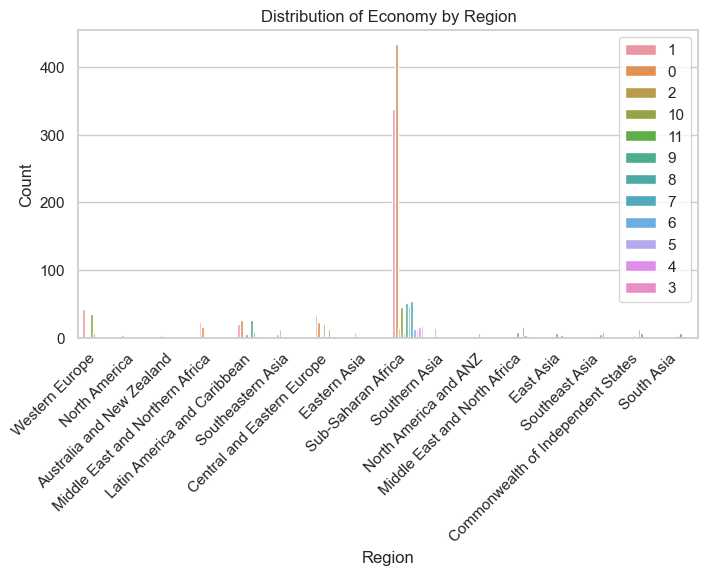

In [94]:
sns.set(style = "whitegrid")

plt.figure(figsize = (8, 4))
ax = sns.countplot(x = 'region', hue = 'economy', data = WHR2)

ax.legend(loc = 'upper right')

plt.title('Distribution of Economy by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha = 'right')

plt.show()

In [95]:
# One - hot encoding
print(WHR2.dtypes)

country             object
generosity         float64
year                object
region              object
happiness_rank     float64
happiness_score    float64
economy             object
social_support     float64
life_expectancy    float64
freedom            float64
corruption         float64
dystopia           float64
dtype: object


In [96]:
WHR3 = pd.get_dummies(WHR2, columns=['country', 'region'])

In [97]:
print(WHR3.shape)

(1511, 225)


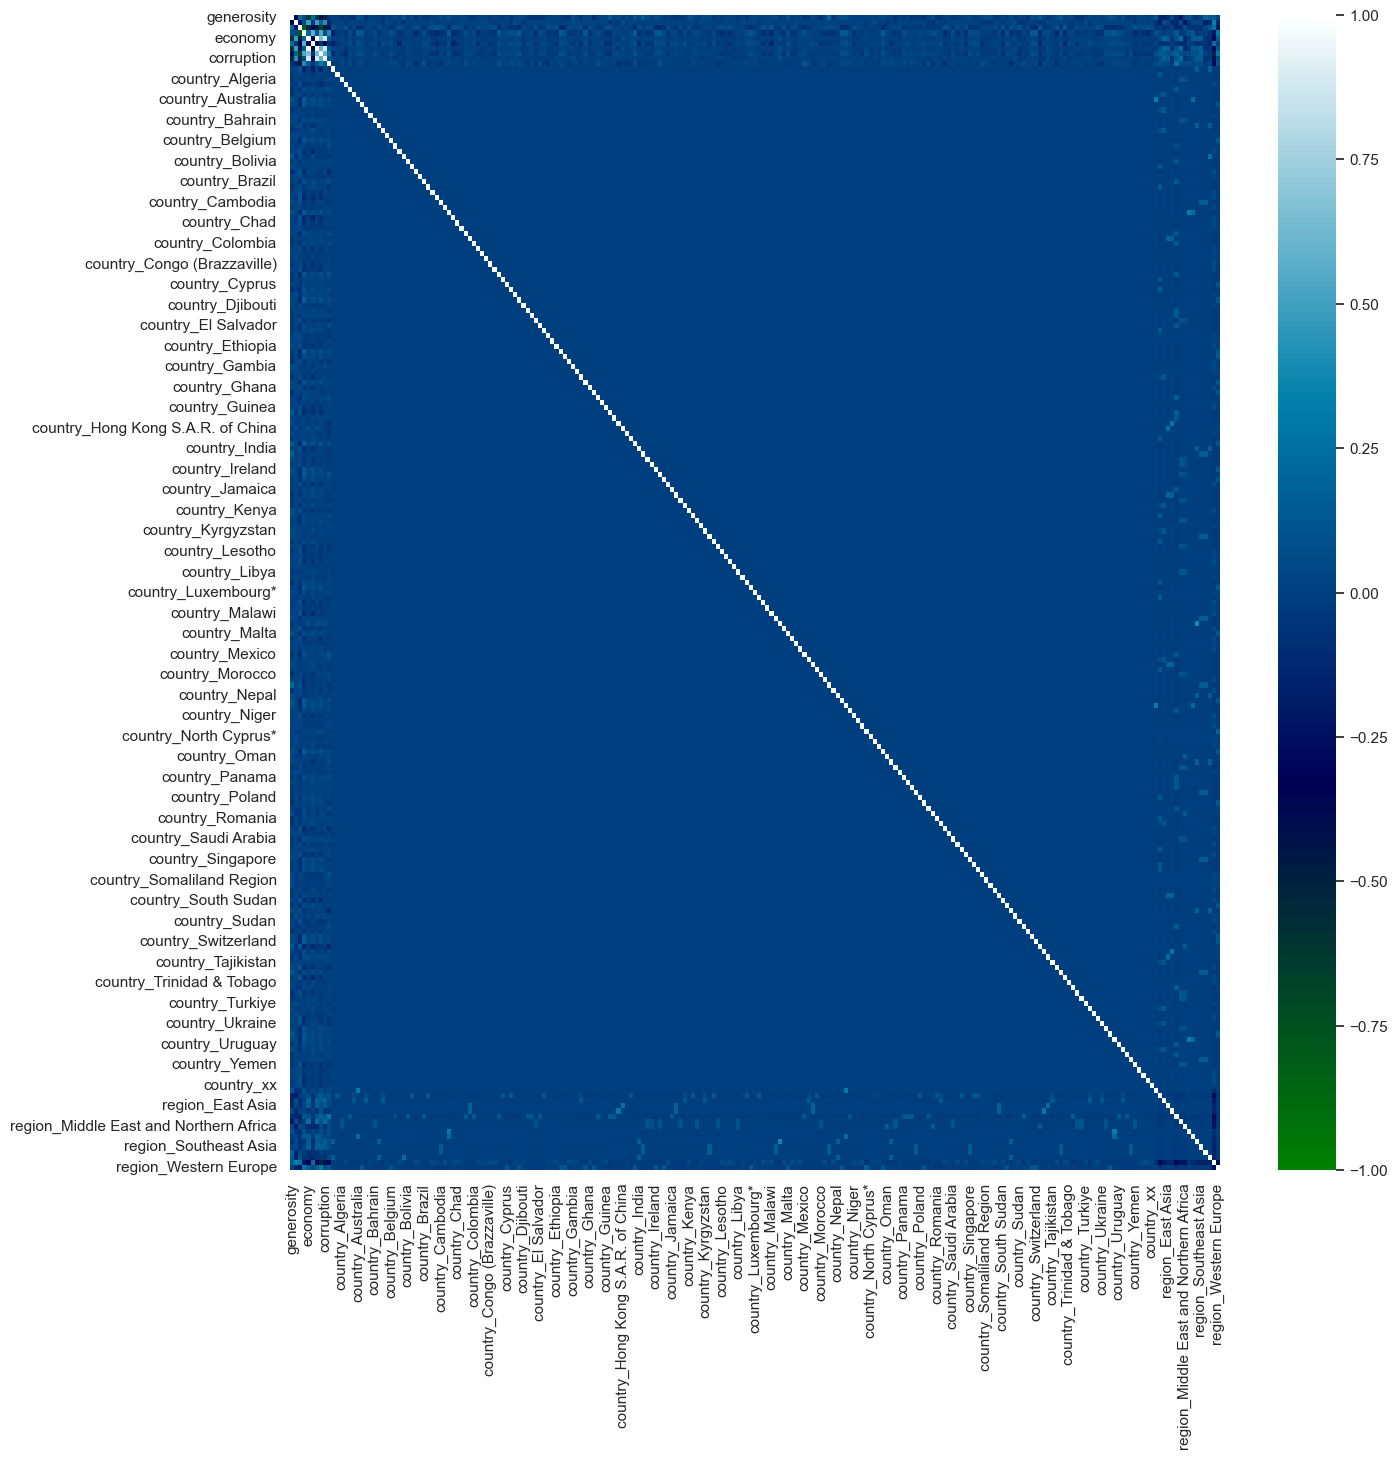

In [98]:
# Feature Selection

# Correlation Matrix Heatmap
corr = WHR3. corr()

plt.figure(figsize= (15,15))
heatmap = sns.heatmap(corr, vmin= -1, vmax= 1, annot = False, cmap= 'ocean', 
                      cbar= True)

plt.show()


In [99]:
# Set the correlation threshold
threshold = 0.2

# Find features that are correlated 
correlated_pairs = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        col1 = corr.columns[i]
        col2 = corr.columns[j]
        corr_value = corr.iloc[i, j]
        if abs(corr_value) >= threshold:  # Check if correlation meets threshold
            correlated_pairs.append((col1, col2, corr_value))

# Print out correlated pairs with their correlation coefficient
print("Correlated pairs with their correlation coefficient (above threshold):")
for col1, col2, corr_value in correlated_pairs:
    print(f"{col1} and {col2} have a correlation of {corr_value:.2f}")

Correlated pairs with their correlation coefficient (above threshold):
generosity and year have a correlation of -0.35
generosity and happiness_rank have a correlation of 0.22
generosity and economy have a correlation of -0.63
generosity and social_support have a correlation of 0.25
generosity and life_expectancy have a correlation of -0.63
generosity and freedom have a correlation of -0.27
generosity and corruption have a correlation of -0.55
generosity and country_Myanmar have a correlation of 0.22
generosity and region_Middle East and North Africa have a correlation of -0.22
generosity and region_Southeastern Asia have a correlation of 0.20
year and happiness_rank have a correlation of -0.23
year and economy have a correlation of 0.48
year and life_expectancy have a correlation of 0.48
year and corruption have a correlation of 0.42
year and region_Middle East and Northern Africa have a correlation of -0.22
year and region_Sub-Saharan Africa have a correlation of 0.34
happiness_rank 

In [100]:
#Set up threshold
target_variable = 'economy'
threshold = 0.0

#Find features with significant correlation with the target variable
significant_correlations = corr[target_variable].drop(target_variable).where(lambda x: abs(x) > threshold).dropna()

#Print
for feature, corr_value in significant_correlations.items():
    print(f"{feature} and {target_variable} have a correlation of {corr_value:.2f}")

generosity and economy have a correlation of -0.63
year and economy have a correlation of 0.48
happiness_rank and economy have a correlation of -0.52
happiness_score and economy have a correlation of 0.19
social_support and economy have a correlation of -0.34
life_expectancy and economy have a correlation of 0.99
freedom and economy have a correlation of 0.66
corruption and economy have a correlation of 0.88
dystopia and economy have a correlation of 0.14
country_Afghanistan and economy have a correlation of -0.02
country_Albania and economy have a correlation of -0.01
country_Algeria and economy have a correlation of 0.01
country_Angola and economy have a correlation of -0.04
country_Argentina and economy have a correlation of 0.02
country_Armenia and economy have a correlation of -0.01
country_Australia and economy have a correlation of 0.02
country_Austria and economy have a correlation of 0.02
country_Azerbaijan and economy have a correlation of -0.00
country_Azerbaijan* and econom

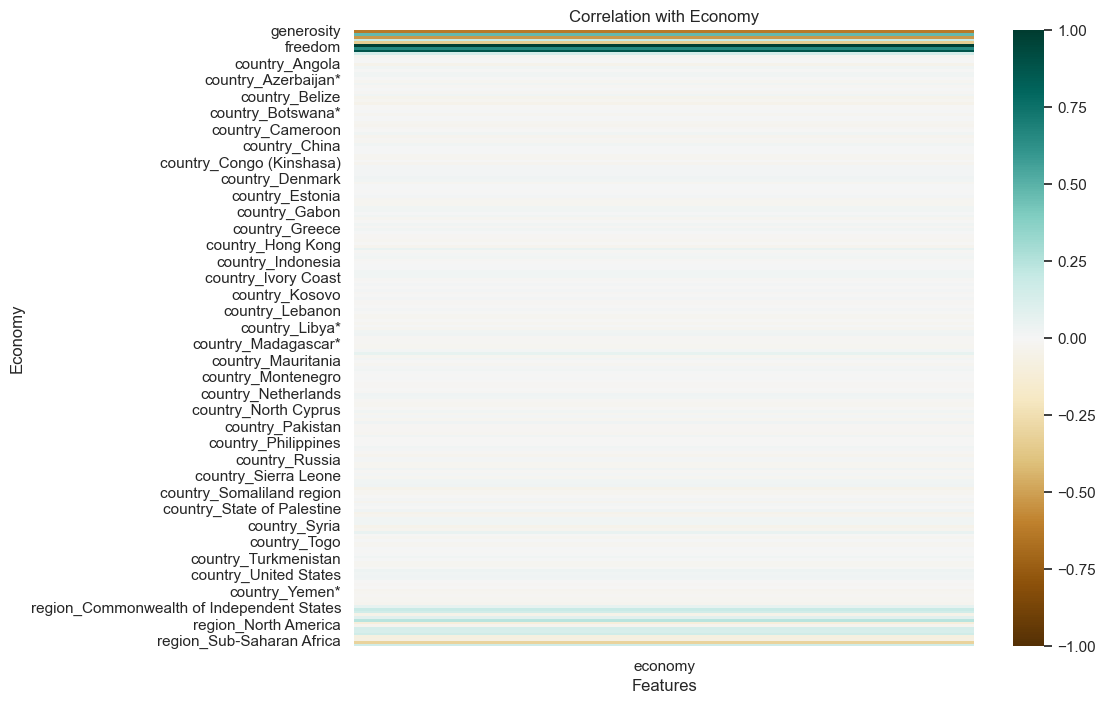

In [101]:
# Calculate correlations
correlation_matrix = WHR3.corr()

# Filter correlations with 'loan_status'
correlation_with_loan_status = correlation_matrix['economy'].drop('economy')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_loan_status.to_frame(), cmap='BrBG', annot=False, fmt=".2f", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation with Economy")
plt.xlabel("Features")
plt.ylabel("Economy")
plt.show()


In [102]:
# Select features based on correlation outcome
selected_features = ['year', 'happiness_rank', 'life_expectancy', 'freedom', 'corruption',
                     'country_Australia', 'country_Canada', 'country_United States',
                     'country_Hong Kong S.A.R. of China', 'country_Maldives',
                     'region_Middle East and North Africa', 'region_Sub-Saharan Africa',
                     'economy'] 

# Filter the dataset to keep only the selected features
WHR4 = WHR3[selected_features]

# Display the first few rows of the filtered dataset
WHR4.head()

,year,happiness_rank,life_expectancy,freedom,corruption,country_Australia,country_Canada,country_United States,country_Hong Kong S.A.R. of China,country_Maldives,region_Middle East and North Africa,region_Sub-Saharan Africa,economy
0,2015,1.0,0.94143,0.94143,0.41978,False,False,False,False,False,False,False,1
1,2015,2.0,0.94784,0.94784,0.14145,False,False,False,False,False,False,False,1
2,2015,3.0,0.87464,0.87464,0.48357,False,False,False,False,False,False,False,1
3,2015,4.0,0.88521,0.88521,0.36503,False,False,False,False,False,False,False,1
4,2015,5.0,0.90563,0.90563,0.32957,False,True,False,False,False,False,False,1


In [103]:
# MACHINE LEARNING ALGORITHMS(LINEAR REGRESSION & RANDOM FOREST MODELS)

# Define features (independent variables) and target variable (dependent variable)
X = WHR4.drop(columns=['economy'])  # Features
Y = WHR4['economy']  # Target variable

# Split the data into training and testing sets (75-25 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


In [104]:
# Create a pipeline that standardizes the data then applies linear regression
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('regressor', LinearRegression())])

# Fit the pipeline to the training data
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [105]:
# Random forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=1234)

# Fit the model to the training data
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=1234)

In [106]:
# Make predictions on the testing data
Y_pred_logistic = pipeline.predict(X_test)
Y_pred_rf = random_forest_model.predict(X_test)

In [107]:
# Compute evaluation metrics for logistic regression model
mae_logistic = mean_absolute_error(Y_test,Y_pred_logistic)
mse_logistic = mean_squared_error(Y_test, Y_pred_logistic)
r2_logistic = r2_score(Y_test, Y_pred_logistic)

# Compute evaluation metrics for random forest model
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

# Print evaluation metrics
print("Evaluation metrics for Logistic Regression:")
print("Mean Absolute Error:", mae_logistic)
print("Mean Squared Error:", mse_logistic)
print("R-squared (R^2):", r2_logistic)
print()

print("Evaluation metrics for Random Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared (R^2):", r2_rf)

Evaluation metrics for Logistic Regression:
Mean Absolute Error: 0.36323496850320836
Mean Squared Error: 0.2615343326710208
R-squared (R^2): 0.9832945355236351

Evaluation metrics for Random Forest:
Mean Absolute Error: 0.28833333333333333
Mean Squared Error: 0.2104261904761905
R-squared (R^2): 0.9865590600897567


In [108]:
#Get feature importances
importances = random_forest_model.feature_importances_

#Create a DataFrame to view the features and their importance scores
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

#Sort the DataFrame to see the most important features at the top
features_df.sort_values(by='Importance', ascending=False, inplace=True)

print(features_df)

                                Feature  Importance
2                       life_expectancy    0.983405
1                        happiness_rank    0.008561
4                            corruption    0.003256
3                               freedom    0.002626
0                                  year    0.001846
10  region_Middle East and North Africa    0.000179
11            region_Sub-Saharan Africa    0.000080
7                 country_United States    0.000022
5                     country_Australia    0.000016
8     country_Hong Kong S.A.R. of China    0.000009
6                        country_Canada    0.000000
9                      country_Maldives    0.000000


In [109]:
WHR5 = WHR2.copy()

WHR5.head()

,country,generosity,year,region,happiness_rank,happiness_score,economy,social_support,life_expectancy,freedom,corruption,dystopia
0,Switzerland,0.29678,2015,Western Europe,1.0,7.587,1,1.34951,0.94143,0.94143,0.41978,2.51738
1,Iceland,0.43630,2015,Western Europe,2.0,7.561,1,1.40223,0.94784,0.94784,0.14145,2.70201
2,Denmark,0.34139,2015,Western Europe,3.0,7.527,1,1.36058,0.87464,0.87464,0.48357,2.49204
3,Norway,0.34699,2015,Western Europe,4.0,7.522,1,1.33095,0.88521,0.88521,0.36503,2.46531
4,Canada,0.45811,2015,North America,5.0,7.427,1,1.32261,0.90563,0.90563,0.32957,2.45176


In [110]:
print(WHR5.dtypes)

country             object
generosity         float64
year                object
region              object
happiness_rank     float64
happiness_score    float64
economy             object
social_support     float64
life_expectancy    float64
freedom            float64
corruption         float64
dystopia           float64
dtype: object


In [111]:
# Calculate the average happiness score for each country
average_happiness_score = WHR5.groupby('country')['happiness_score'].mean()

# Sort the countries based on the average happiness score
sorted_average_scores = average_happiness_score.sort_values(ascending=False)

# Select the top two countries
top_two_countries = sorted_average_scores.head(2)

# Display the top two countries and their average happiness scores
print("Top Two Countries with Highest Average Happiness Score:")
print(top_two_countries)

Top Two Countries with Highest Average Happiness Score:
country
Finland    7.642165
Denmark    7.570155
Name: happiness_score, dtype: float64


In [112]:
# Group the dataset by country
grouped_country = WHR5.groupby('country')

# Extract data for the United States, Finland, and Denmark
usa = grouped_country.get_group('United States')
finland = grouped_country.get_group('Finland')
denmark = grouped_country.get_group('Denmark')

# Now you have separate datasets for each country
print("United States data:")
print(usa.head())

print("\nFinland data:")
print(finland.head())

print("\nDenmark data:")
print(denmark.head())

United States data:
           country  generosity  year              region  happiness_rank  \
14   United States    0.401050  2015       North America            15.0   
170  United States    0.410770  2016       North America            13.0   
328  United States    0.392579  2017  Sub-Saharan Africa            17.4   
487  United States    0.291000  2018  Sub-Saharan Africa            18.0   
644  United States    0.280000  2019  Sub-Saharan Africa            19.0   

     happiness_score economy  social_support  life_expectancy   freedom  \
14             7.119       1        1.247110         0.861790  0.861790   
170            7.104       1        1.047820         0.779000  0.779000   
328            6.993       1        1.419921         0.774287  0.639673   
487            6.886       1        1.471000         0.819000  0.547000   
644            6.892       1        1.457000         0.874000  0.454000   

     corruption  dystopia  
14     0.158900  2.510110  
170    0.148680 

In [113]:
# Perform one-hot encoding for 'country' and 'region' columns
usa2 = pd.get_dummies(usa, columns=['country', 'region'])

In [114]:
# Perform one-hot encoding for 'country' and 'region' columns
finland2 = pd.get_dummies(finland, columns=['country', 'region'])

In [115]:
# Perform one-hot encoding for 'country' and 'region' columns
denmark2 = pd.get_dummies(denmark, columns=['country', 'region'])

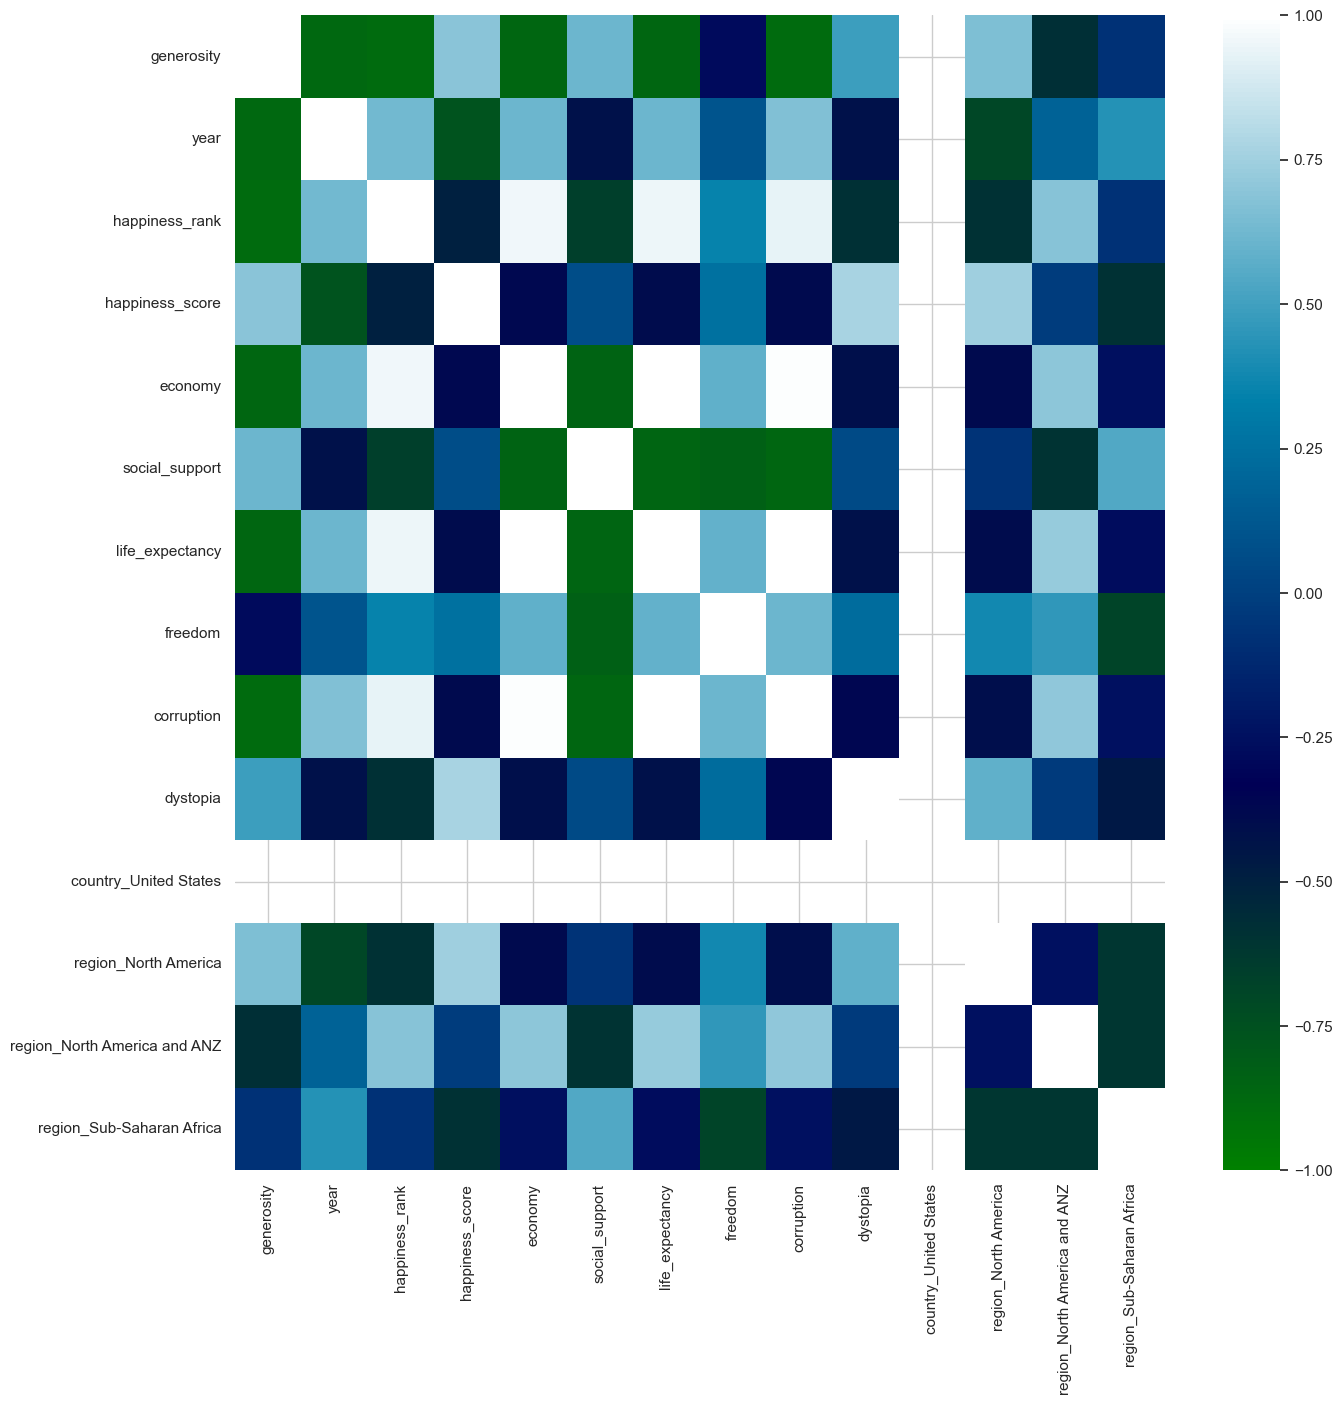

In [116]:
# Correlation Matrix Heatmap
corr_usa = usa2. corr()

plt.figure(figsize= (15,15))
heatmap = sns.heatmap(corr_usa, vmin= -1, vmax= 1, annot = False, cmap= 'ocean', cbar= True)

plt.show()

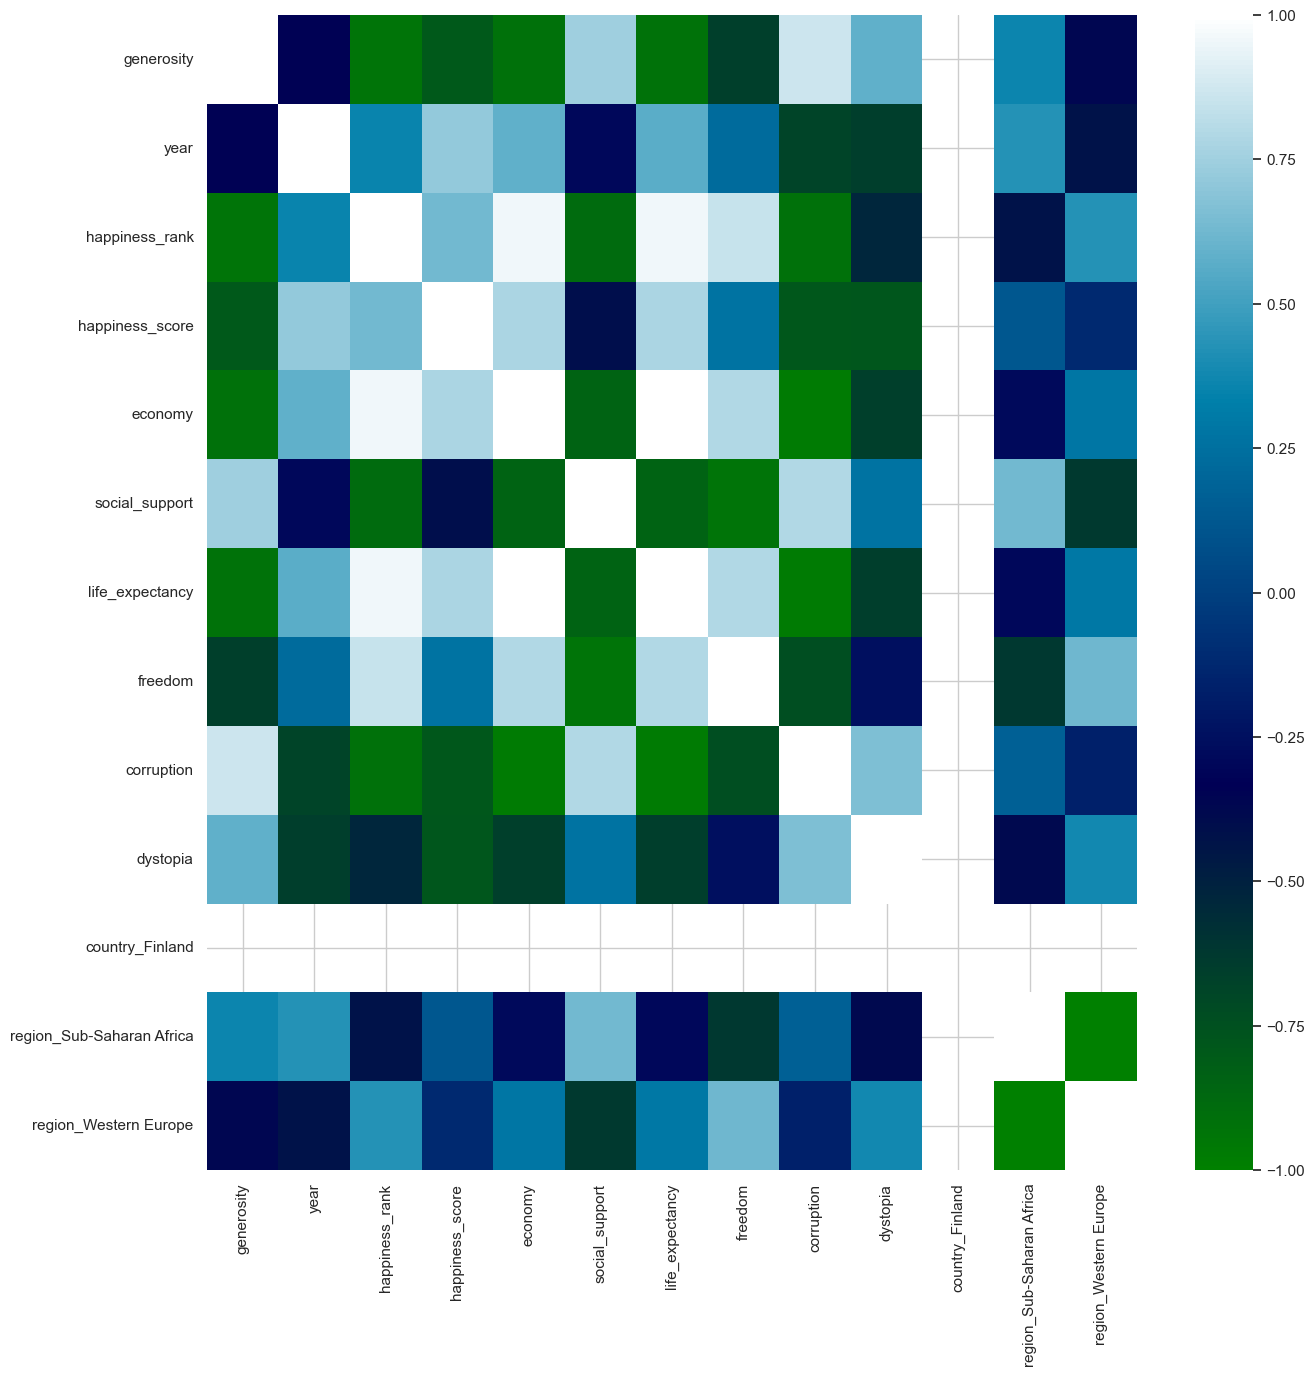

In [117]:
# Correlation Matrix Heatmap
corr_finland = finland2. corr()

plt.figure(figsize= (15,15))
heatmap = sns.heatmap(corr_finland, vmin= -1, vmax= 1, annot = False, cmap= 'ocean', cbar= True)

plt.show()


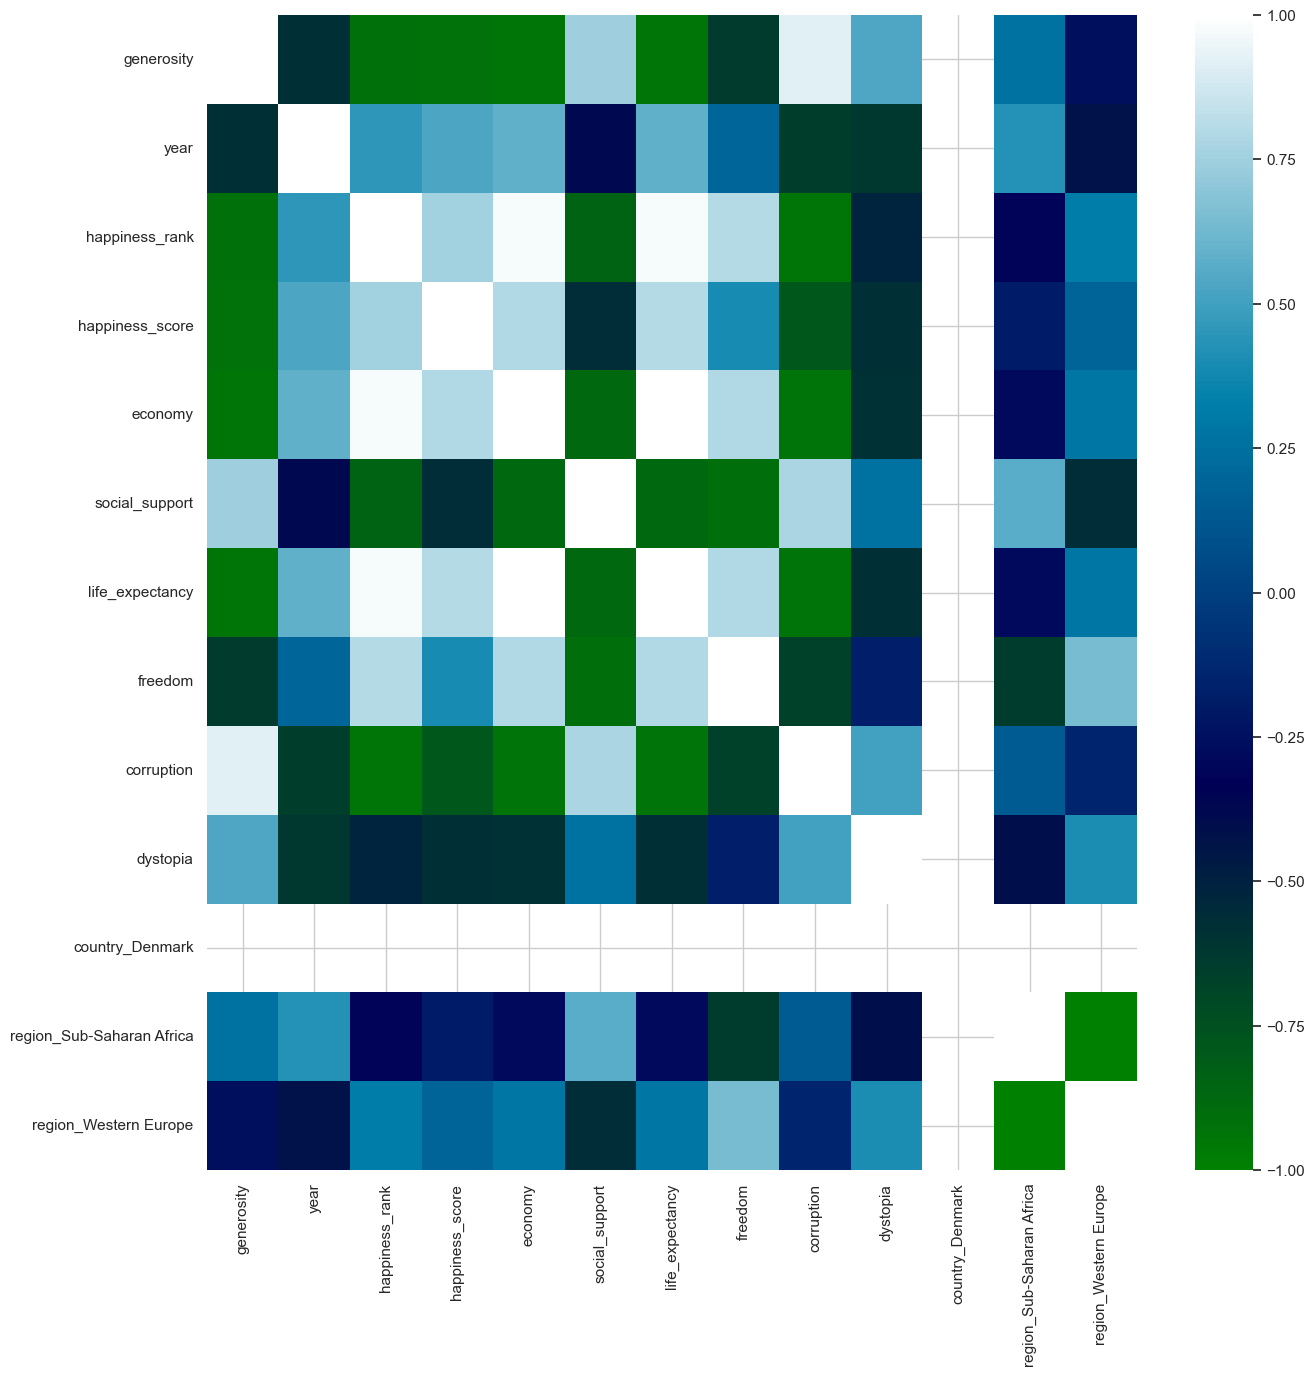

In [118]:
# Correlation Matrix Heatmap
corr_denmark = denmark2. corr()

plt.figure(figsize= (15,15))
heatmap = sns.heatmap(corr_denmark, vmin= -1, vmax= 1, annot = False, cmap= 'ocean', cbar= True)

plt.show()

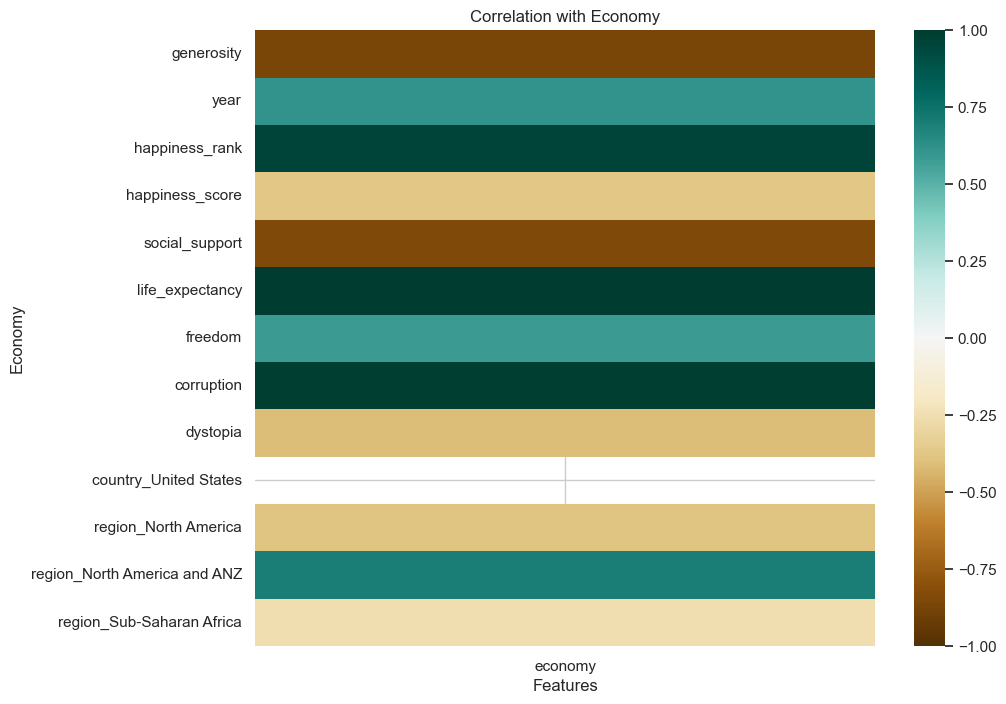

In [119]:
# Calculate correlations
corr_matrix_usa = usa2.corr()

# Filter correlations with 'economy'
correlation_with_economy_usa = corr_matrix_usa['economy'].drop('economy')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_economy_usa.to_frame(), cmap='BrBG', annot=False, fmt=".2f", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation with Economy")
plt.xlabel("Features")
plt.ylabel("Economy")
plt.show()

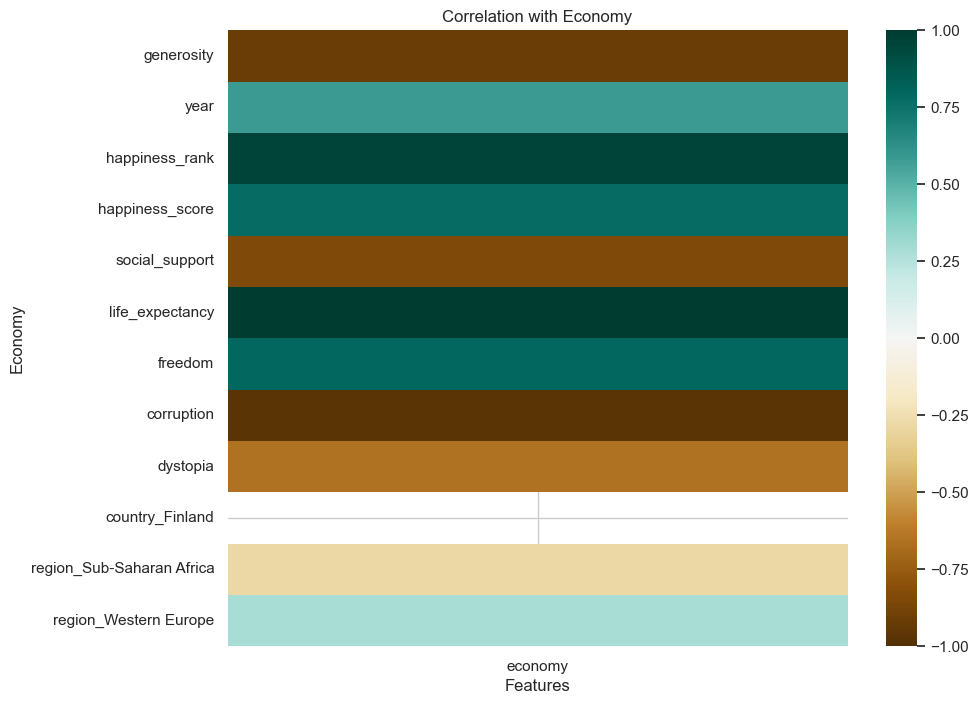

In [120]:
# Calculate correlations
corr_matrix_finland = finland2.corr()

# Filter correlations with 'economy'
correlation_with_economy_fin = corr_matrix_finland['economy'].drop('economy')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_economy_fin.to_frame(), cmap='BrBG', annot=False, fmt=".2f", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation with Economy")
plt.xlabel("Features")
plt.ylabel("Economy")
plt.show()

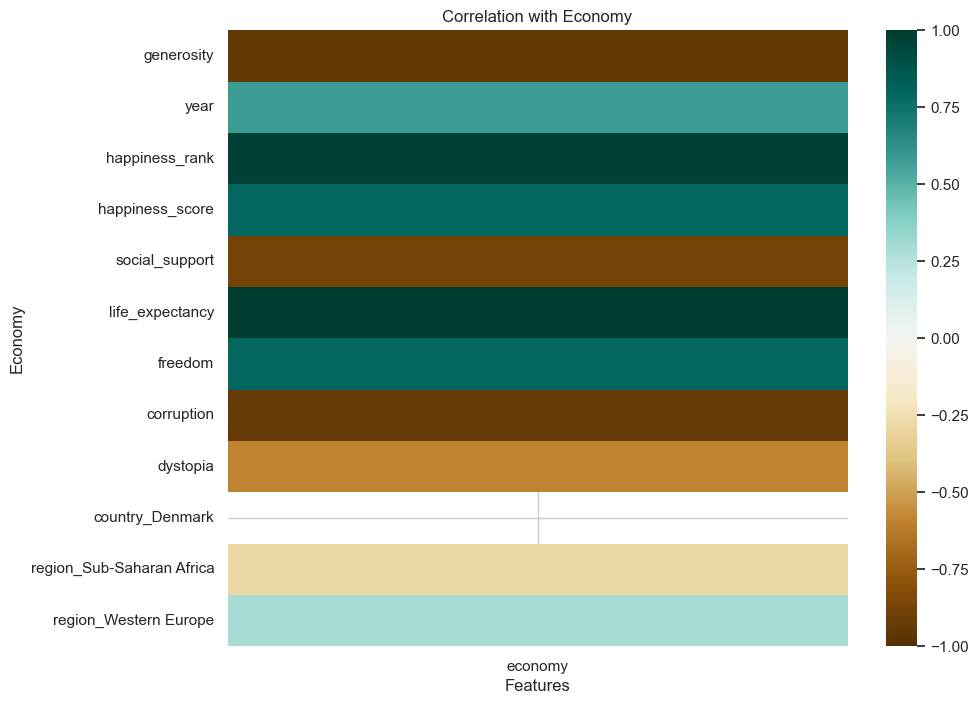

In [121]:
# Calculate correlations
corr_matrix_denmark = denmark2.corr()

# Filter correlations with 'loan_status'
correlation_with_economy_den = corr_matrix_denmark['economy'].drop('economy')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_economy_den.to_frame(), cmap='BrBG', annot=False, fmt=".2f", vmin=-1, vmax=1, cbar=True)
plt.title("Correlation with Economy")
plt.xlabel("Features")
plt.ylabel("Economy")
plt.show()

In [122]:
#ML Algorithms usa2 - small'x' and small'y'
# Define features (independent variables) and target variable (dependent variable)
x  = usa2.drop(columns=['economy'])  # Features
y = usa2['economy']  # Target variable

# Split the data into training and testing sets (75-25 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [123]:
# Create a pipeline that standardizes the data then applies linear regression
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('regressor', LinearRegression())])

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [124]:
# Random forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=1234)

# Fit the model to the training data
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1234)

In [125]:
# Make predictions on the testing data
y_pred_logistic = pipeline.predict(x_test)
y_pred_rf       = random_forest_model.predict(x_test)

In [126]:
# Compute evaluation metrics for logistic regression model
mae_logistic = mean_absolute_error(y_test, y_pred_logistic)
mse_logistic = mean_squared_error(y_test, y_pred_logistic)
r2_logistic = r2_score(y_test, y_pred_logistic)

# Compute evaluation metrics for random forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Evaluation metrics for Logistic Regression:")
print("Mean Absolute Error:", mae_logistic)
print("Mean Squared Error:", mse_logistic)
print("R-squared (R^2):", r2_logistic)
print()

print("Evaluation metrics for Random Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared (R^2):", r2_rf)

Evaluation metrics for Logistic Regression:
Mean Absolute Error: 1.1588204753589755
Mean Squared Error: 1.754771304476871
R-squared (R^2): 0.9132255948335614

Evaluation metrics for Random Forest:
Mean Absolute Error: 2.6
Mean Squared Error: 7.811666666666667
R-squared (R^2): 0.6137087912087912


In [127]:
# Define features (independent variables) and target variable (dependent variable)
XX = finland2.drop(columns=['economy'])  # Features
YY = finland2['economy']  # Target variable

# Split the data into training and testing sets (75-25 split)
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.25, random_state=42)

In [128]:
# Create a pipeline that standardizes the data then applies linear regression
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('regressor', LinearRegression())])

# Fit the pipeline to the training data
pipeline.fit(XX_train, YY_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [129]:
# Random forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=1234)

# Fit the model to the training data
random_forest_model.fit(XX_train, YY_train)

RandomForestRegressor(random_state=1234)

In [130]:
# Make predictions on the testing data
YY_pred_logistic = pipeline.predict(XX_test)
YY_pred_rf       = random_forest_model.predict(XX_test)

In [131]:
# Compute evaluation metrics for logistic regression model
mae_logistic = mean_absolute_error(YY_test, YY_pred_logistic)
mse_logistic = mean_squared_error(YY_test, YY_pred_logistic)
r2_logistic  = r2_score(YY_test, YY_pred_logistic)

# Compute evaluation metrics for random forest model
mae_rf = mean_absolute_error(YY_test, YY_pred_rf)
mse_rf = mean_squared_error(YY_test, YY_pred_rf)
r2_rf  = r2_score(YY_test, YY_pred_rf)

# Print evaluation metrics
print("Evaluation metrics for Logistic Regression:")
print("Mean Absolute Error:", mae_logistic)
print("Mean Squared Error:", mse_logistic)
print("R-squared (R^2):", r2_logistic)
print()

print("Evaluation metrics for Random Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared (R^2):", r2_rf)

Evaluation metrics for Logistic Regression:
Mean Absolute Error: 1.5989200681121176
Mean Squared Error: 3.413726486645103
R-squared (R^2): 0.8103485285197165

Evaluation metrics for Random Forest:
Mean Absolute Error: 2.3033333333333332
Mean Squared Error: 5.8137
R-squared (R^2): 0.6770166666666667


In [132]:
# Define features (independent variables) and target variable (dependent variable)
xx = denmark2.drop(columns=['economy'])  # Features
yy = denmark2['economy']  # Target variable

# Split the data into training and testing sets (75-25 split)
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.25, random_state=42)

In [133]:
# Create a pipeline that standardizes the data then applies linear regression
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('regressor', LinearRegression())])

# Fit the pipeline to the training data
pipeline.fit(xx_train, yy_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [134]:
# Random forest regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=1234)

# Fit the model to the training data
random_forest_model.fit(xx_train, yy_train)

RandomForestRegressor(random_state=1234)

In [135]:
# Make predictions on the testing data
yy_pred_logistic = pipeline.predict(xx_test)
yy_pred_rf = random_forest_model.predict(xx_test)

In [136]:
# Compute evaluation metrics for logistic regression model
mae_logistic = mean_absolute_error(yy_test, yy_pred_logistic)
mse_logistic = mean_squared_error(yy_test, yy_pred_logistic)
r2_logistic  = r2_score(yy_test, yy_pred_logistic)

# Compute evaluation metrics for random forest model
mae_rf = mean_absolute_error(yy_test, yy_pred_rf)
mse_rf = mean_squared_error(yy_test, yy_pred_rf)
r2_rf  = r2_score(yy_test, yy_pred_rf)

# Print evaluation metrics
print("Evaluation metrics for Logistic Regression:")
print("Mean Absolute Error:", mae_logistic)
print("Mean Squared Error:", mse_logistic)
print("R-squared (R^2):", r2_logistic)
print()

print("Evaluation metrics for Random Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared (R^2):", r2_rf)

Evaluation metrics for Logistic Regression:
Mean Absolute Error: 0.953363775253386
Mean Squared Error: 1.2879785215882558
R-squared (R^2): 0.9284456376895414

Evaluation metrics for Random Forest:
Mean Absolute Error: 2.2866666666666666
Mean Squared Error: 6.285666666666667
R-squared (R^2): 0.6507962962962963


In [137]:
#Get feature importances
importances = random_forest_model.feature_importances_

#Create a DataFrame to view the features and their importance scores
features_xx = pd.DataFrame({'Feature': xx.columns, 'Importance': importances})

#Sort the DataFrame to see the most important features at the top
features_xx.sort_values(by='Importance', ascending=False, inplace=True)

print(features_xx)

                      Feature  Importance
2              happiness_rank    0.187510
4              social_support    0.150950
3             happiness_score    0.143840
5             life_expectancy    0.133695
6                     freedom    0.111054
0                  generosity    0.100202
1                        year    0.071395
8                    dystopia    0.042132
7                  corruption    0.034883
11      region_Western Europe    0.021841
10  region_Sub-Saharan Africa    0.002499
9             country_Denmark    0.000000


<function matplotlib.pyplot.show(close=None, block=None)>

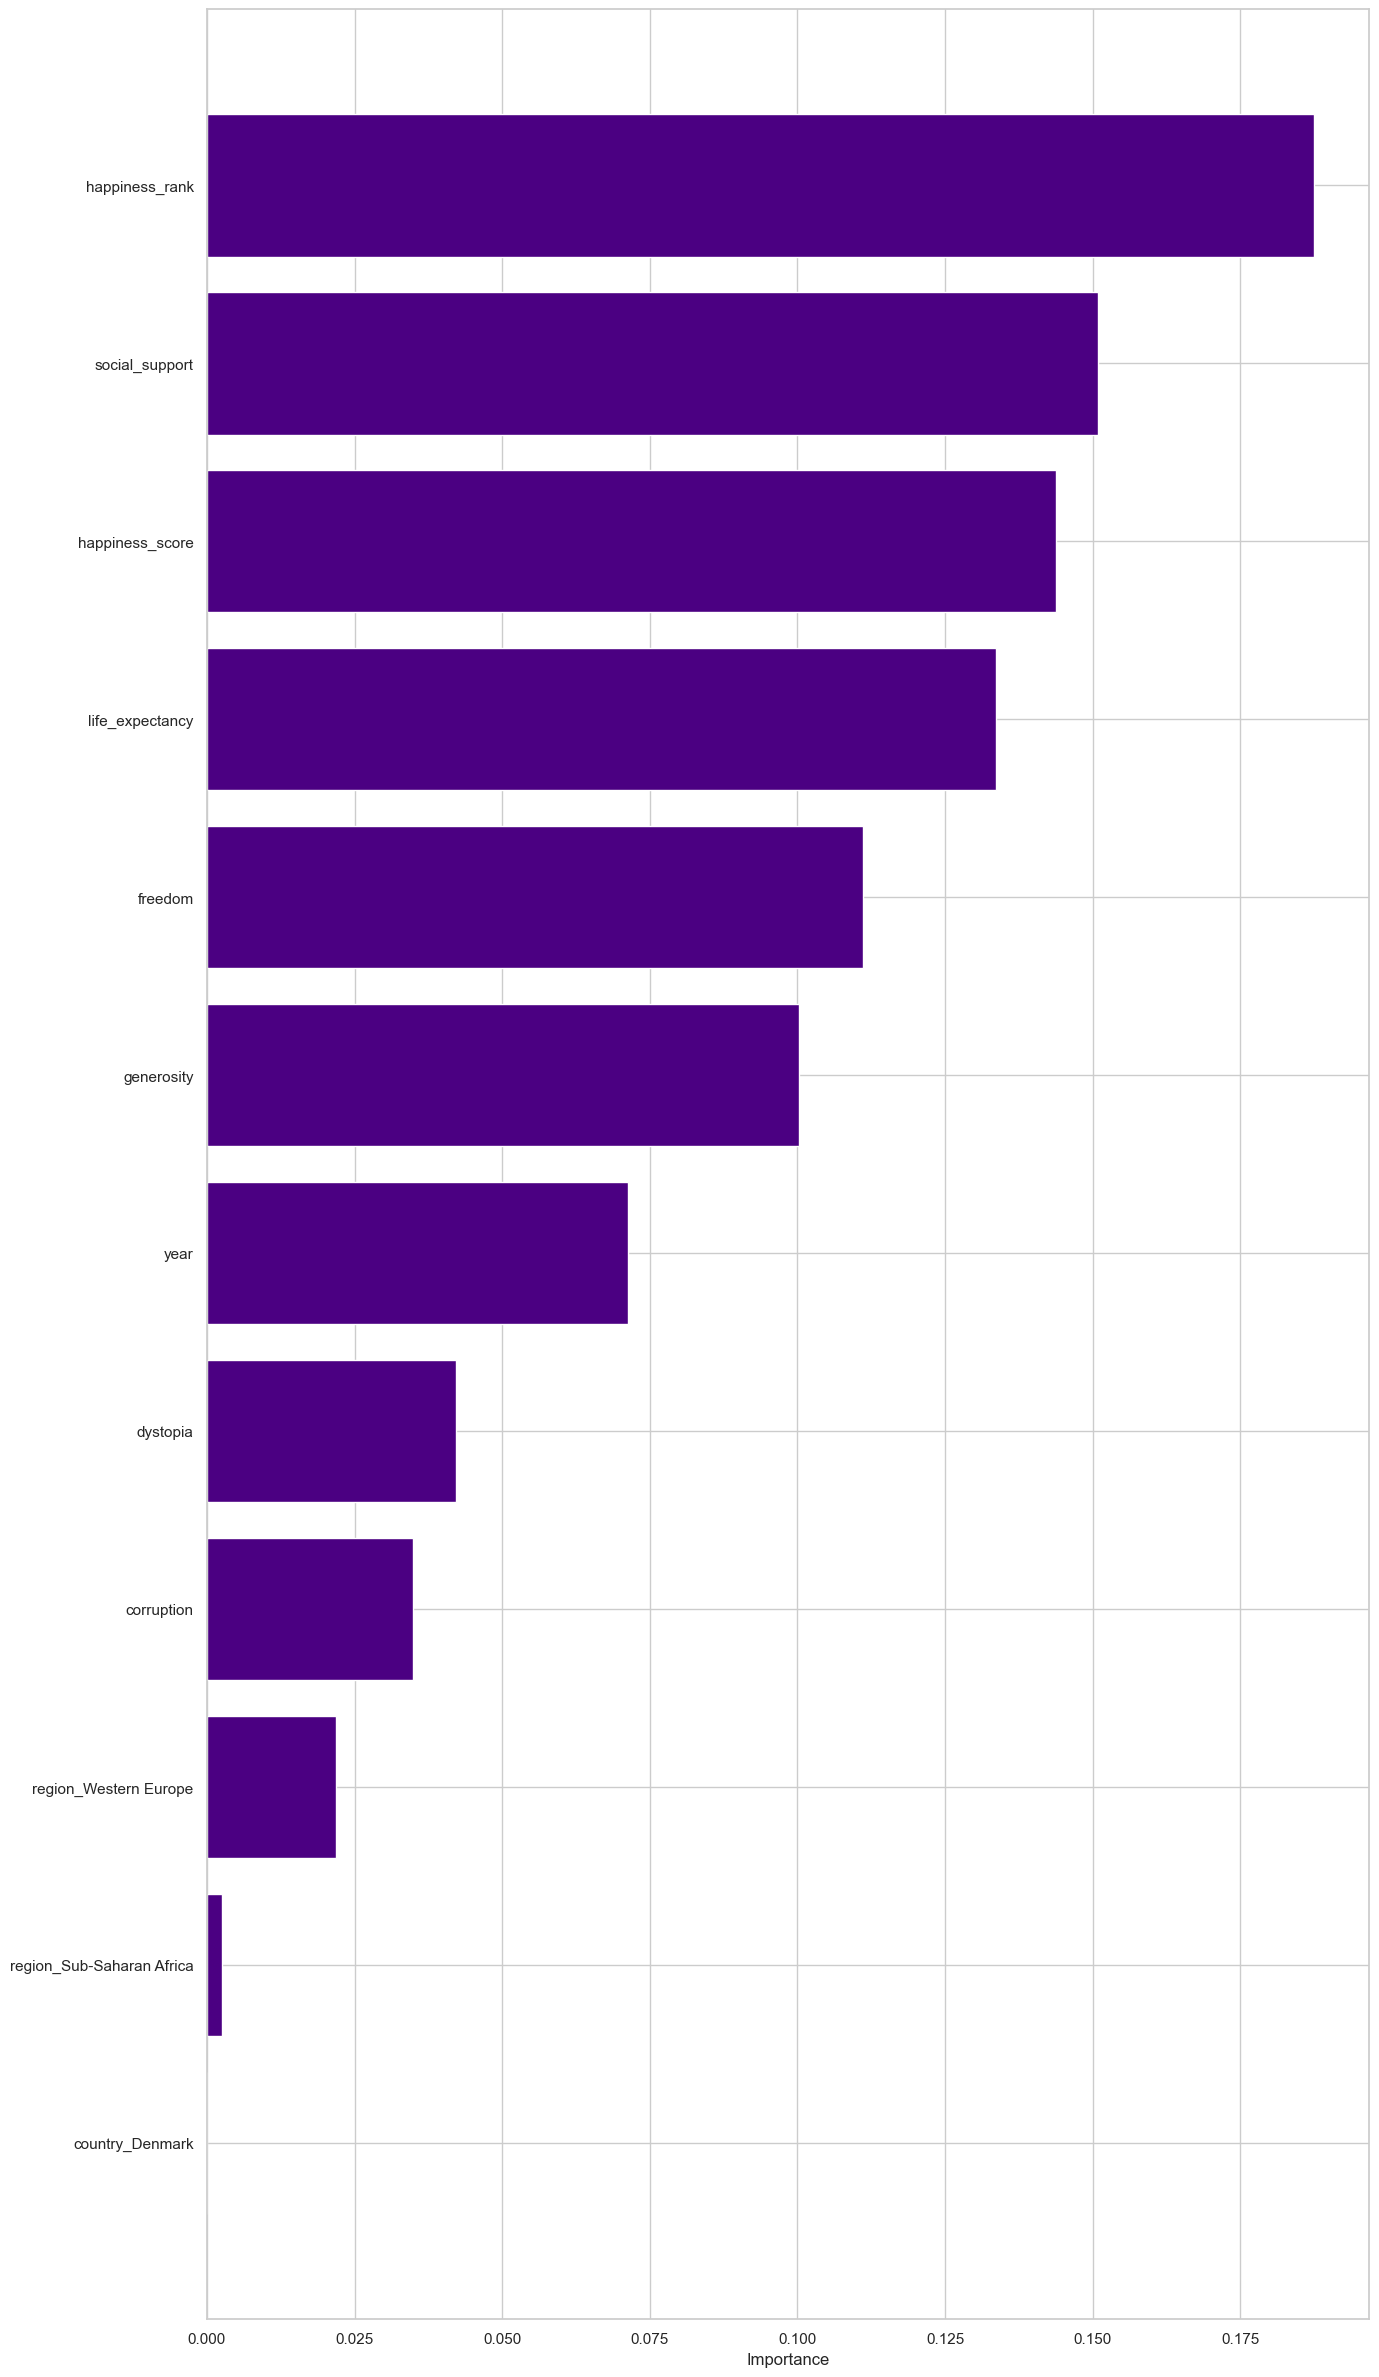

In [138]:
#Visualize the feature importances for Random Forest
plt.figure(figsize=(15, 30))
plt.barh(features_xx['Feature'], features_xx['Importance'], color='indigo')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  
plt.show